<a href="https://colab.research.google.com/github/Natalia409634/Grupo7-practica1-ML/blob/main/G7_P1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

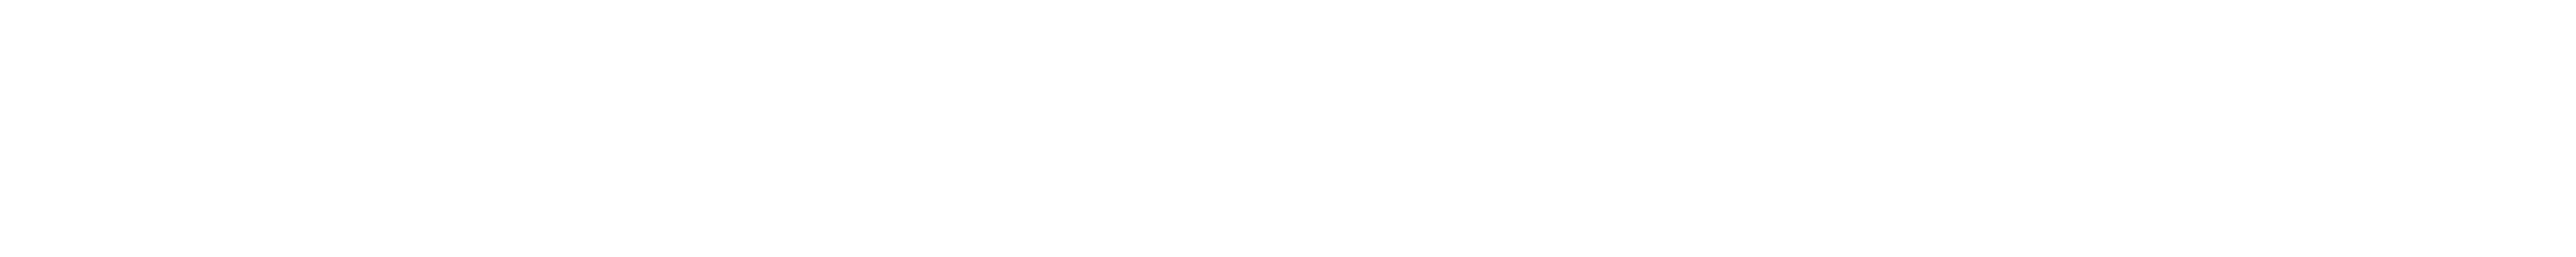

# **PRÁCTICA 1: PREDICCIÓN DE LA ENERGÍA SOLAR**


*   Aprendizaje Automático - Grupo 7
*   Andrés Felipe Camacho Martínez - 100408821
*   Natalia Jiménez Barrigüete - 100409634

# Librerías y lectura de datos

In [113]:
# Configuraciones
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')
import time

# Tratamiento de datos
# ==============================================================================
import pandas as pd   
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import matplotlib.ticker as ticker

# Preprocesado y modelado
# ==============================================================================
!pip install fitter
from fitter import Fitter, get_common_distributions
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, KFold

# Instalar statsmodels para intervalos de confianza 
# ==============================================================================
!pip install statsmodels
!pip install --upgrade linear-tree

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Lectura de datos

In [114]:
disp_df, comp_df = [pd.read_csv(f, compression="bz2", index_col=0) for f in 
                    ["/content/drive/MyDrive/Aprendizaje Automático/datos practica/disp_st7ns1.txt.bz2",
                     "/content/drive/MyDrive/Aprendizaje Automático/datos practica/comp_st7ns1.txt.bz2"]]

Edición visual de los gráficos

In [115]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'darkblue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

# Análisis Exploratorio de datos (EDA)

1.   Comprender la naturaleza de los datos
2.   Identificar y tratar los datos faltantes
3.   Análisis previo de las variables
4.   Análisis de las Variables Explicativas
  1. Identificación de valores atípicos
  2. Análisis de las varianzas
  3. Análisis de correlación
  4. Análisis de distribución
  5. Relación entre las Variables Explicativas con la Variable Independiente
  
5.   Análisis de la Variable Independiente
  1. Identificación de valores atípicos
  2. Análisis de distribución

6.   Eliminación de variables
7.   Separación en conjuntos
8.   Normalización / Estandarización de los datos
  1. Normalización de los datos aplicando Min Max
  2. Estandarización de los datos aplicando StandardScaler
  3. No necesitan normalización / estandarización

## 1. Comprender la naturaleza de los datos

In [116]:
disp_df.shape

(4380, 76)

Nuestro conjunto de datos tiene 4380 instancias y 76 variables (15var x 5día + var de salida)

El método info() nos da información sobre las columnas

In [117]:
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [118]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, V4381 to V5113
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  733 non-null    float64
 1   apcp_sf2_1  733 non-null    float64
 2   apcp_sf3_1  733 non-null    float64
 3   apcp_sf4_1  733 non-null    float64
 4   apcp_sf5_1  733 non-null    float64
 5   dlwrf_s1_1  733 non-null    float64
 6   dlwrf_s2_1  733 non-null    float64
 7   dlwrf_s3_1  733 non-null    float64
 8   dlwrf_s4_1  733 non-null    float64
 9   dlwrf_s5_1  733 non-null    float64
 10  dswrf_s1_1  733 non-null    float64
 11  dswrf_s2_1  733 non-null    float64
 12  dswrf_s3_1  733 non-null    float64
 13  dswrf_s4_1  733 non-null    float64
 14  dswrf_s5_1  733 non-null    float64
 15  pres_ms1_1  733 non-null    float64
 16  pres_ms2_1  733 non-null    float64
 17  pres_ms3_1  733 non-null    float64
 18  pres_ms4_1  733 non-null    float64
 19  pres_ms5_1  733 non-null    

Observaciones principales:

*   La columna 70 la reconoce como tipo int64 en lugar de float64 como el resto



## 2. Identificar y tratar los datos faltantes

Los datos pueden contener errores, datos faltantes, duplicados, entre otros problemas. Por lo tanto, necesitamos limpiarlos antes de entrenar el modelo.

In [119]:
disp_df.isnull().sum()

apcp_sf1_1    0
apcp_sf2_1    0
apcp_sf3_1    0
apcp_sf4_1    0
apcp_sf5_1    0
             ..
uswrf_s2_1    0
uswrf_s3_1    0
uswrf_s4_1    0
uswrf_s5_1    0
salida        0
Length: 76, dtype: int64

In [120]:
disp_df.dropna()

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000         0.0    0.000000    0.000000    0.000000  250.765400   
V2       0.000000         0.0    0.000000    0.009091    0.010909  267.362233   
V3       0.000000         0.0    0.000000    0.000000    0.000000  222.643638   
V4       0.000909         0.0    0.000000    0.000000    0.000000  269.499409   
V5       0.000000         0.0    0.000000    0.000000    0.000000  241.344566   
...           ...         ...         ...         ...         ...         ...   
V4376    0.000909         0.0    0.000909    0.000000    0.000000  268.168651   
V4377    0.000000         0.0    0.000000    0.000000    0.000000  254.187456   
V4378    0.000000         0.0    0.000000    0.000000    0.000000  270.627982   
V4379    0.000000         0.0    0.000000    0.000000    0.000909  268.680231   
V4380    0.000000         0.0    0.000000    0.000000    0.000000  266.476257   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1     244.423459  250.810849  269.559490  268.286532  ...  247.777202   
V2     250.278670  274.982095  293.350833  281.656355  ...  238.549172   
V3     217.905113  224.133093  251.074578  253.476495  ...  233.556009   
V4     224.078362  225.675403  237.365465  238.349503  ...  244.280412   
V5     244.017960  252.214458  295.031791  304.845553  ...  237.979387   
...           ...         ...         ...         ...  ...         ...   
V4376  261.124151  266.273302  281.954662  277.734320  ...  249.984808   
V4377  256.191119  263.439742  287.966780  288.432201  ...  242.674612   
V4378  265.384824  268.626864  284.752031  284.260479  ...  244.978506   
V4379  262.617518  266.925831  290.610293  293.442266  ...  257.979990   
V4380  265.436182  273.861434  301.931283  296.996230  ...  246.534181   

       ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  \
V1     250.487543  264.160586  260.795116           0    8.000000   49.636364   
V2     233.845458  251.197511  252.962007           0    7.090909   33.000000   
V3     239.208023  257.450057  253.893104           0    8.000000   51.000000   
V4     246.125845  256.927582  252.958314           0    8.000000   51.272727   
V5     243.498259  243.310007  222.655228           0    7.909091   49.454545   
...           ...         ...         ...         ...         ...         ...   
V4376  252.052567  260.826037  260.334861           0    8.454545   49.181818   
V4377  248.607801  269.338423  266.205636           0    8.000000   49.181818   
V4378  256.735739  288.550856  287.388403           0    8.363636   51.090909   
V4379  264.526767  279.741230  265.984283           0    8.454545   51.818182   
V4380  242.974326  222.992049  236.758119           0    7.818182   46.272727   

       uswrf_s4_1  uswrf_s5_1    salida  
V1     113.818182   79.181818  11487900  
V2      93.454545   66.272727   9235200  
V3     116.090909   80.727273  11895900  
V4     119.000000   83.636364  12186600  
V5     106.363636   68.545455   6411300  
...           ...         ...       ...  
V4376  109.181818   75.363636  11660100  
V4377  110.727273   76.181818  11555400  
V4378  116.727273   80.818182  11949900  
V4379  114.000000   77.000000  11738400  
V4380   99.636364   69.545455   8349300  

[4380 rows x 76 columns]

In [121]:
disp_df.drop_duplicates()

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000         0.0    0.000000    0.000000    0.000000  250.765400   
V2       0.000000         0.0    0.000000    0.009091    0.010909  267.362233   
V3       0.000000         0.0    0.000000    0.000000    0.000000  222.643638   
V4       0.000909         0.0    0.000000    0.000000    0.000000  269.499409   
V5       0.000000         0.0    0.000000    0.000000    0.000000  241.344566   
...           ...         ...         ...         ...         ...         ...   
V4376    0.000909         0.0    0.000909    0.000000    0.000000  268.168651   
V4377    0.000000         0.0    0.000000    0.000000    0.000000  254.187456   
V4378    0.000000         0.0    0.000000    0.000000    0.000000  270.627982   
V4379    0.000000         0.0    0.000000    0.000000    0.000909  268.680231   
V4380    0.000000         0.0    0.000000    0.000000    0.000000  266.476257   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1     244.423459  250.810849  269.559490  268.286532  ...  247.777202   
V2     250.278670  274.982095  293.350833  281.656355  ...  238.549172   
V3     217.905113  224.133093  251.074578  253.476495  ...  233.556009   
V4     224.078362  225.675403  237.365465  238.349503  ...  244.280412   
V5     244.017960  252.214458  295.031791  304.845553  ...  237.979387   
...           ...         ...         ...         ...  ...         ...   
V4376  261.124151  266.273302  281.954662  277.734320  ...  249.984808   
V4377  256.191119  263.439742  287.966780  288.432201  ...  242.674612   
V4378  265.384824  268.626864  284.752031  284.260479  ...  244.978506   
V4379  262.617518  266.925831  290.610293  293.442266  ...  257.979990   
V4380  265.436182  273.861434  301.931283  296.996230  ...  246.534181   

       ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  \
V1     250.487543  264.160586  260.795116           0    8.000000   49.636364   
V2     233.845458  251.197511  252.962007           0    7.090909   33.000000   
V3     239.208023  257.450057  253.893104           0    8.000000   51.000000   
V4     246.125845  256.927582  252.958314           0    8.000000   51.272727   
V5     243.498259  243.310007  222.655228           0    7.909091   49.454545   
...           ...         ...         ...         ...         ...         ...   
V4376  252.052567  260.826037  260.334861           0    8.454545   49.181818   
V4377  248.607801  269.338423  266.205636           0    8.000000   49.181818   
V4378  256.735739  288.550856  287.388403           0    8.363636   51.090909   
V4379  264.526767  279.741230  265.984283           0    8.454545   51.818182   
V4380  242.974326  222.992049  236.758119           0    7.818182   46.272727   

       uswrf_s4_1  uswrf_s5_1    salida  
V1     113.818182   79.181818  11487900  
V2      93.454545   66.272727   9235200  
V3     116.090909   80.727273  11895900  
V4     119.000000   83.636364  12186600  
V5     106.363636   68.545455   6411300  
...           ...         ...       ...  
V4376  109.181818   75.363636  11660100  
V4377  110.727273   76.181818  11555400  
V4378  116.727273   80.818182  11949900  
V4379  114.000000   77.000000  11738400  
V4380   99.636364   69.545455   8349300  

[4380 rows x 76 columns]

## 3. Análisis previo de las variables

**Hay que notar que el display te hace un "resumen". los datos completos están más abajo

In [122]:
cols = disp_df.columns.to_list()

display(set_frame_style(disp_df[cols].head(),'Primeros 12 años de datos'))

display(set_frame_style(disp_df[cols].describe(),'Resumen de estadistica'))

display(set_frame_style(disp_df[cols].isna().any().to_frame().transpose(), 'Columnas con valor nulo'))

display(set_frame_style(disp_df[cols].nunique().to_frame().rename({0:'Numero de valores únicos'}, axis=1).transpose(), 'Valores únicos en cada variable'))

#### Conclusiones:

*   No hay ningún valor nulo preocupante
*   Más del 50% de las variables "apcp_sf1" son 0
*   Medias y medianas de las variables que se repiten poco: no hay gran diferencia, por lo que los outliers no deben ser muy extremos
*   Valores que se repiten muy poco: dswrf_s1_1, uswrf_s1_1
*   uswrf_s1_1 solo tiene 1 observación superior a 0 y su varianza es 0 -> habrá que eliminarla


## 4. Análisis de las Variables Explicativas

### 4.1 Identificación de valores atípicos

Existen varias técnicas para identificar datos atípico

**Diagrama de caja (Boxplot):** el diagrama de caja es una herramienta gráfica que muestra la distribución de los datos y destaca los valores atípicos. Los valores atípicos se representan como puntos o círculos fuera del rango intercuartil.


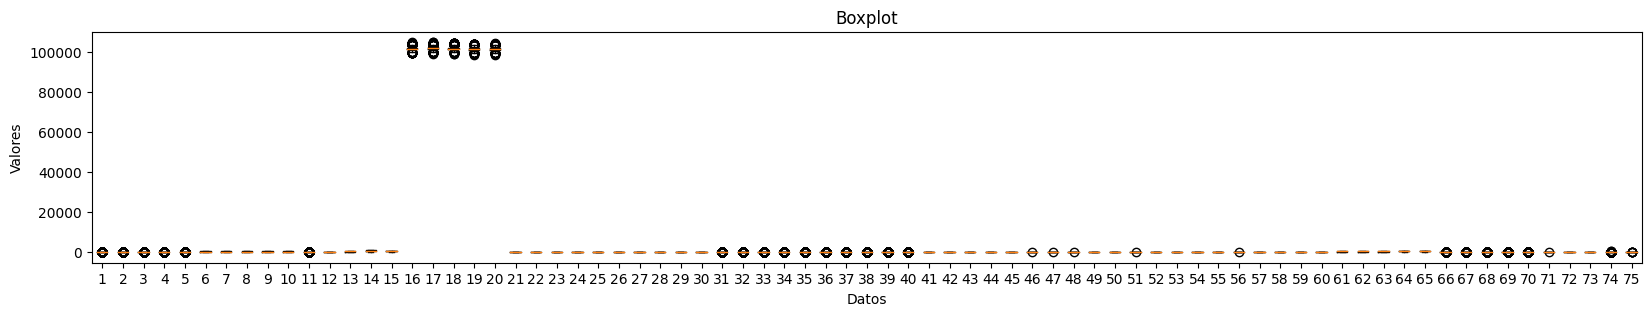

In [123]:
fig, ax = plt.subplots(figsize=(20,3))

ax.boxplot(disp_df.drop(columns = ['salida']))

# Agrega un título y etiquetas de eje
ax.set_title('Boxplot')
ax.set_xlabel('Datos')
ax.set_ylabel('Valores')

# Muestra el gráfico
plt.show()

La línea central en el interior del rectángulo es la mediana (o segundo cuartil).
El rectángulo representa el rango intercuartil (IQR), que se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). El ancho del rectángulo indica la variabilidad de los datos.
**Las líneas que se extienden desde el rectángulo, llamadas bigotes, representan los valores extremos, que son aquellos valores que están por fuera del rango intercuartil.** Los bigotes suelen tener una longitud de 1.5 veces el IQR.
Los puntos que están por fuera de los bigotes se consideran valores atípicos, por lo que no parece que tengamos datos atípicos

### 4.2 Análisis de las varianzas

A la hora de seleccionar que predictores deben estar incluidos en el modelo, debemos evitar aquellos que tengan una varianza muy próxima a 0, ya que no aportan información relevante. Asimismo, es importante rechazar aquellos que aparecen con muy poca frecuencia, pues pueden convertirse en predictores con varianza cero cuando se dividen las observaciones por validación cruzada.

In [124]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(disp_df)
# obtener las varianzas de cada característica
variances = selector.variances_

# seleccionar un valor de corte
cutoff = 0.0001

to_remove = []
feature_names = disp_df.columns[to_remove]

for i, var in enumerate(variances):
    if var < cutoff:
        to_remove.append(i)
        print(feature_names)

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


Hemos encontrado 4 variables que tienen la varianza muy baja. Antes de eliminarlas definitivamente, debemos realizar una validacion cruzada para determinar si la eliminación de características mejora o empeora el rendimiento del modelo. INTERPRETACIÓN

### 4.3 Análisis de correlación

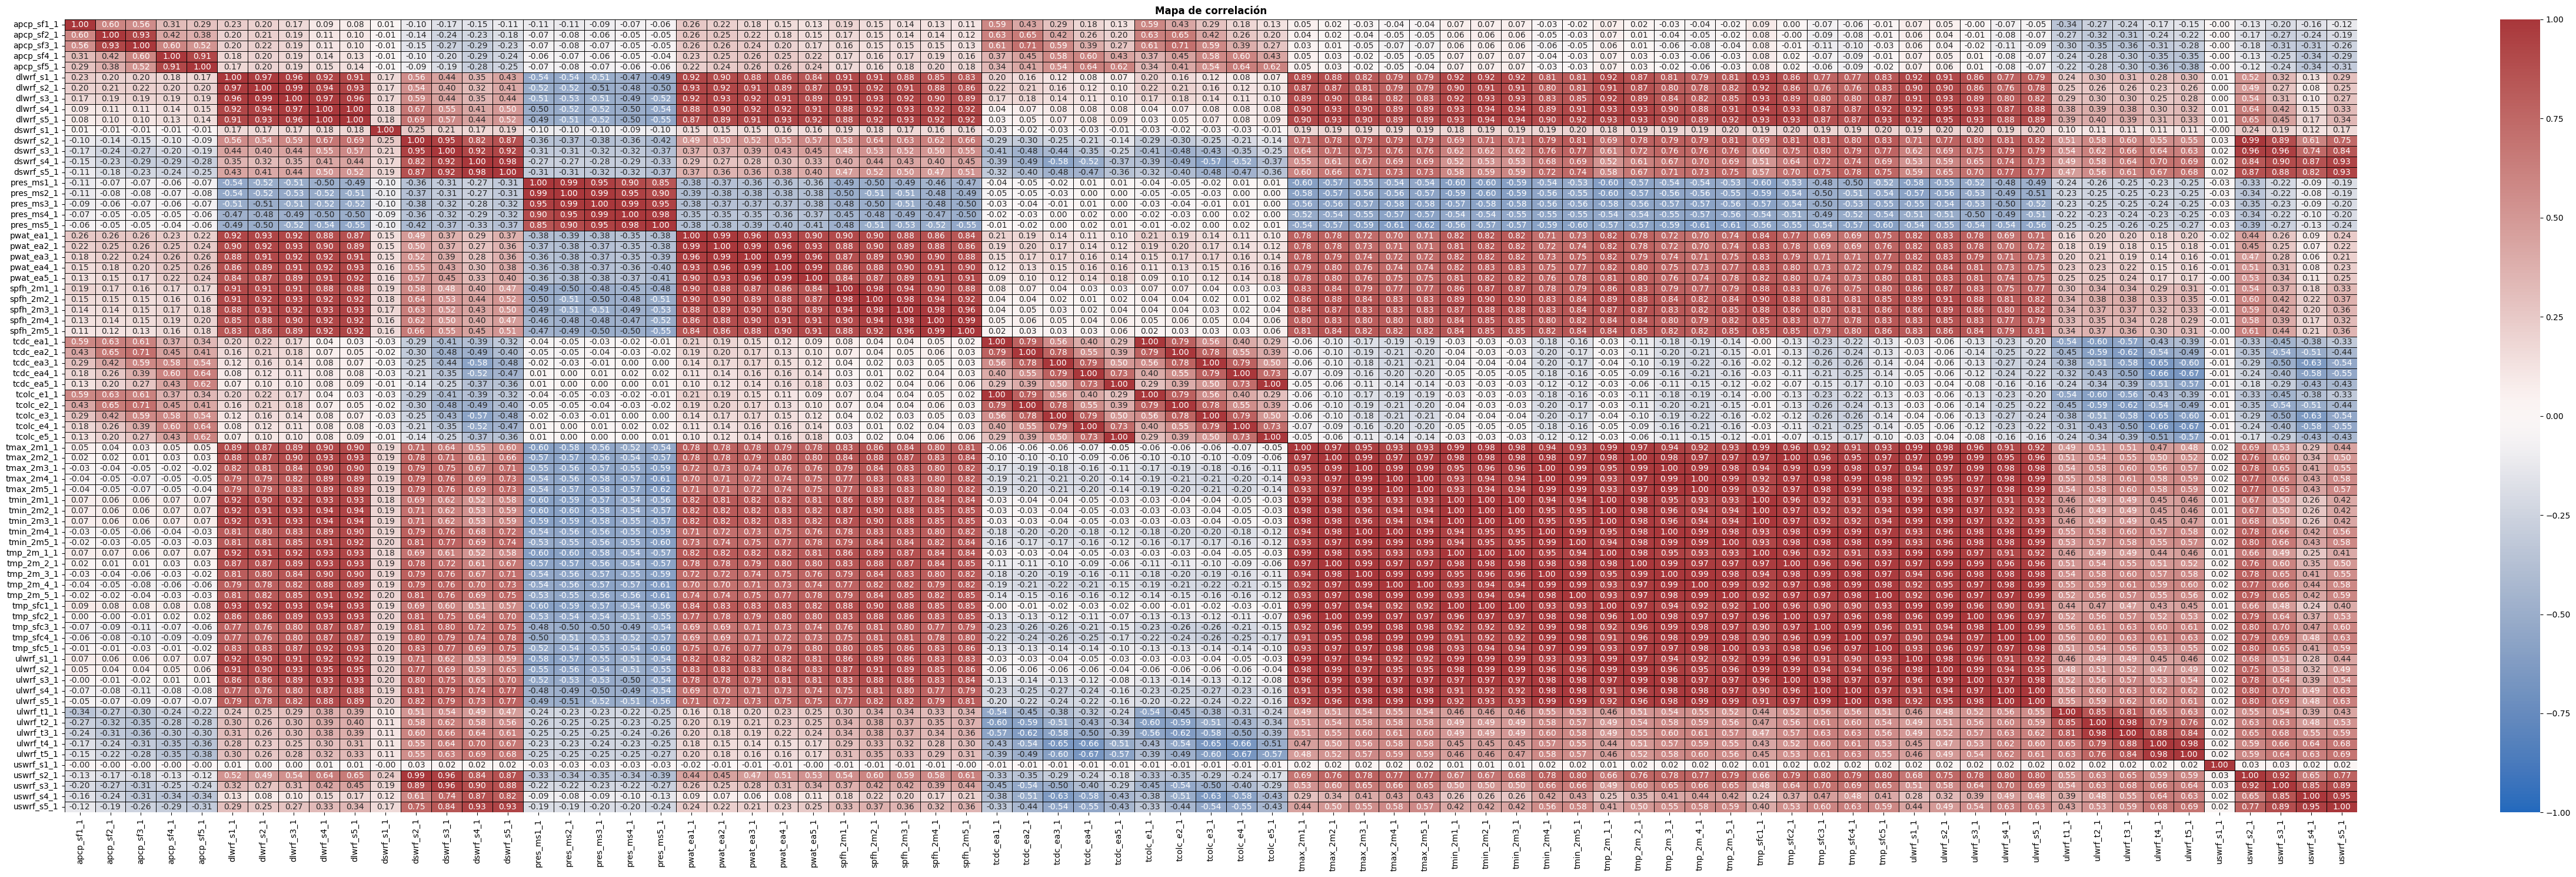

In [125]:
plt.figure(figsize=(50, 15))

df = disp_df.drop(columns = ['salida'])
ax = sns.heatmap(df.loc[:, df.columns != 'id'].corr(), linecolor='black', linewidth='0.6', cmap="vlag", annot=True, fmt=".2f", vmin=-1, vmax=1)
ax.set_title('Mapa de correlación', weight='bold')

plt.tight_layout()
plt.show()

#### Interpretación del mapa de correlación:


*   Alta correlacion entre la temperatura (máxima y mínima) y el flujo radiativo de onda larga en la superficie

*   uswrf_s1_1 (flujo radiativo de onda corta hacia arriba en la superficie) no está correlacionada con ninguna variable



### 4.4 Análisis de distribución

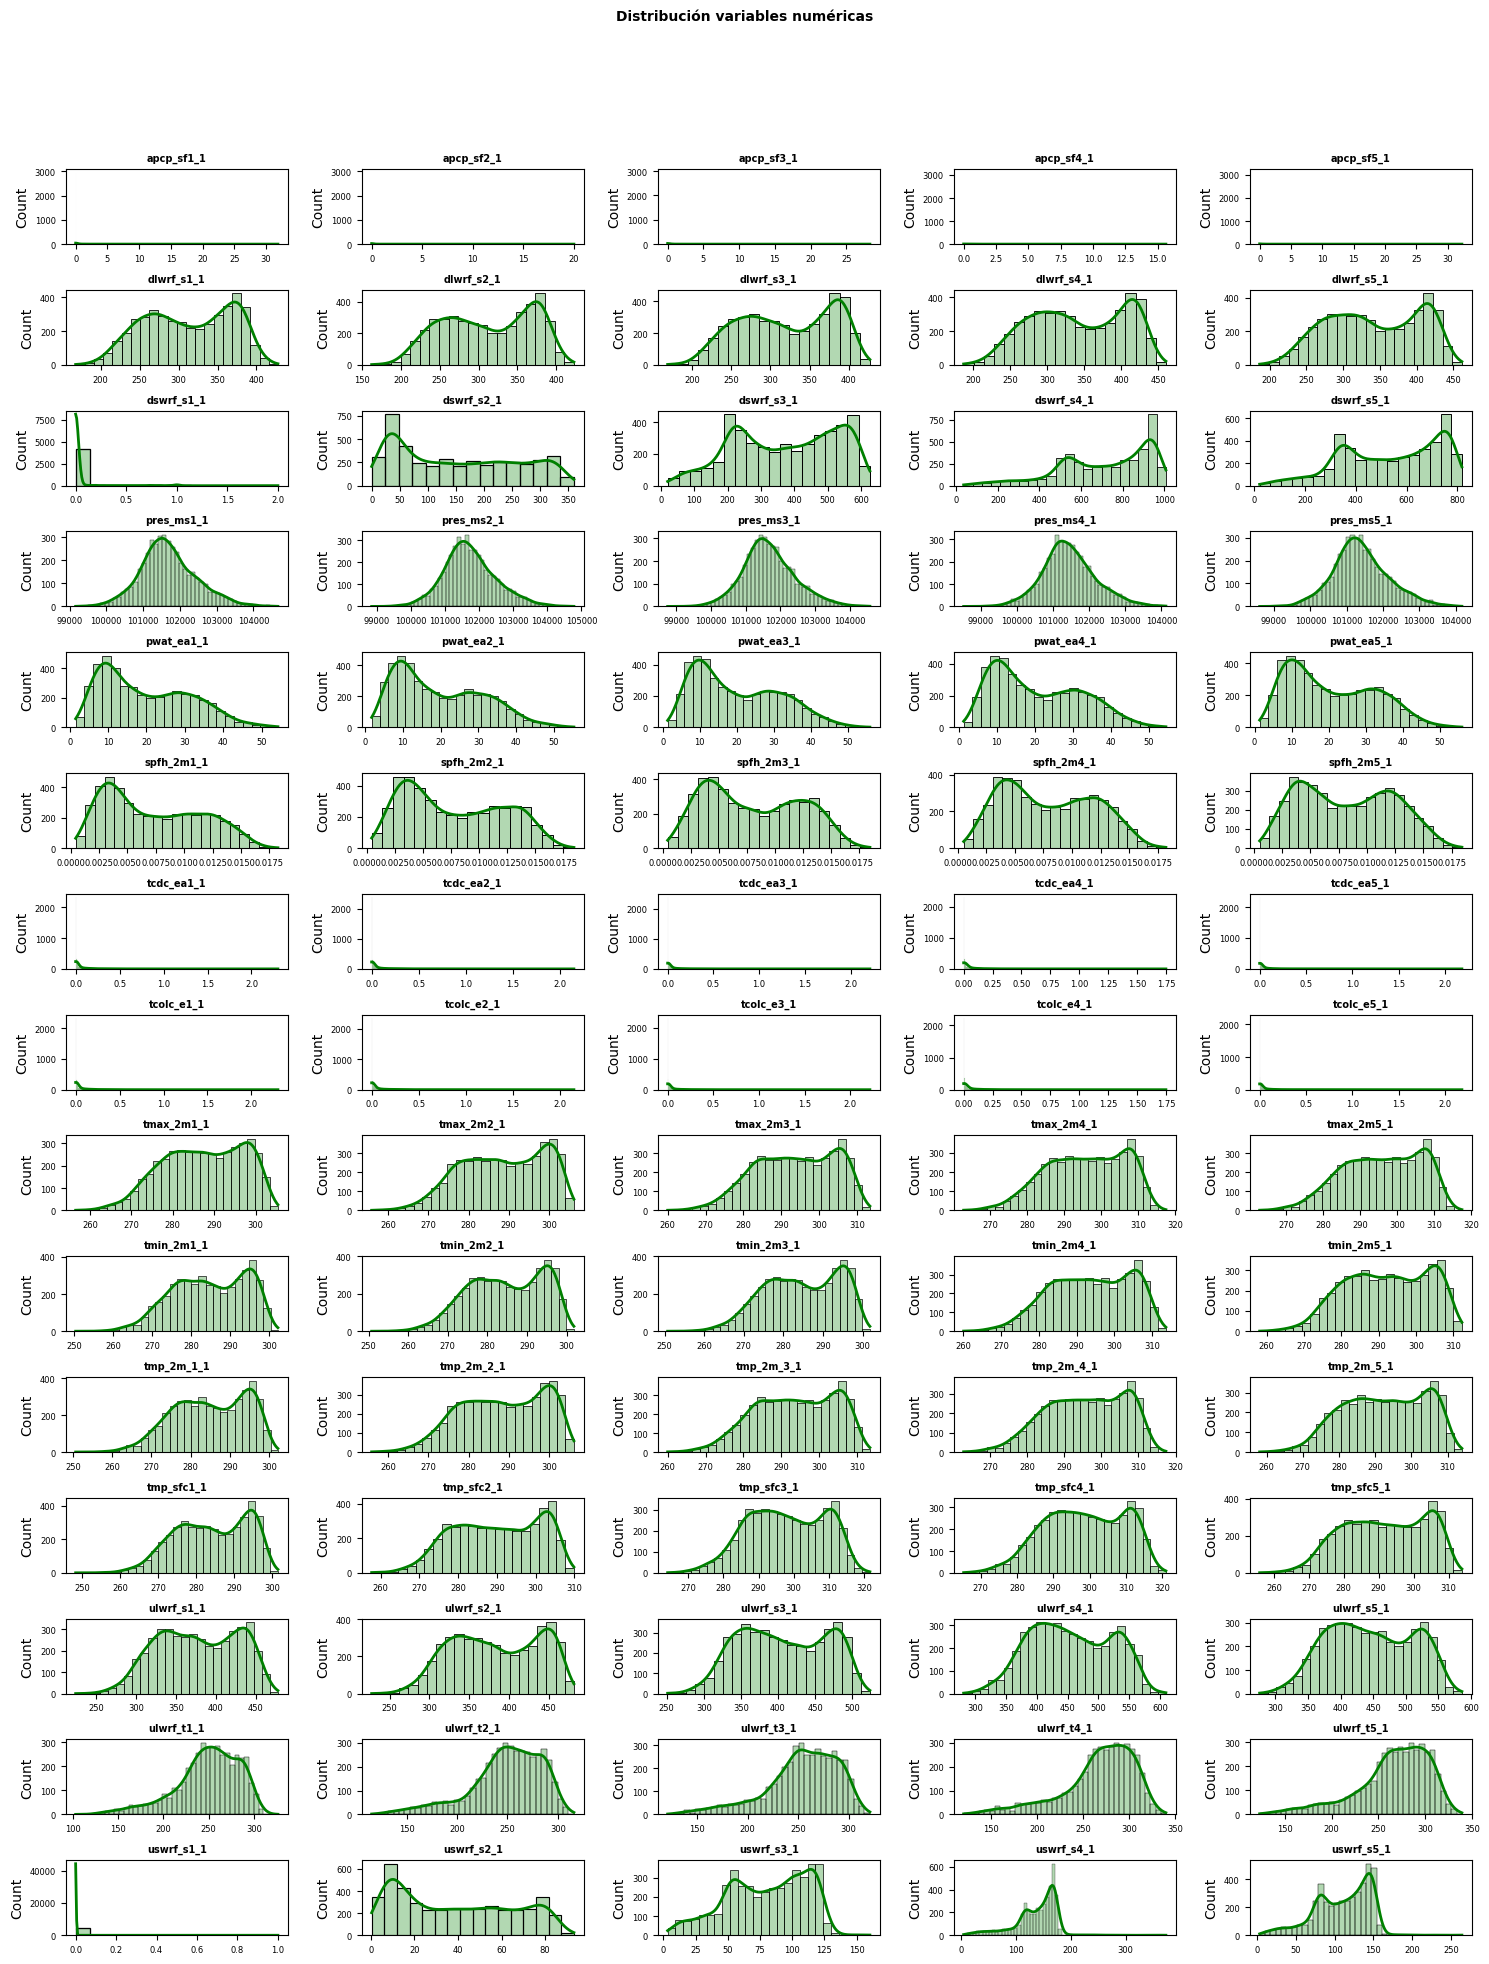

In [126]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=15, ncols=5, figsize=(15, 20))
axes = axes.flat
columnas_numeric = disp_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('salida')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = disp_df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = "green",
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Conclusiones

*  La variable dswrf_s1_1 aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.
*  Las variables tcdc_eaX_1 toman valores muy constantes.

*  LA DISTRIBUCIÓN DE LAS VARIABLES APCP_SFX Hay que modificarla (PREGUNTAR)








#### Tratamiento de la variable (dswrf_s1_1)

Si la variable numérica no sigue una distribución normal, los métodos estadísticos que asumen una distribución normal pueden no ser apropiados. En este caso, transformar la variable a una cualitativa puede ser útil para aplicar métodos no paramétricos.

Si tienes variables que no siguen una distribución normal, esto puede hacer que el análisis y modelado de tus datos sean más desafiantes. Algunos métodos estadísticos pueden requerir transformaciones para hacer que los datos se ajusten mejor a una distribución normal o pueden necesitar un enfoque no paramétrico para la estimación de parámetros. También puede ser necesario utilizar diferentes métricas de evaluación de modelos que no dependan de la suposición de una distribución normal, como el índice de Gini o el coeficiente de correlación de Spearman.


In [127]:
disp_df.dswrf_s1_1.value_counts()

0.000000    4172
1.000000      54
0.090909      27
0.181818      24
0.727273      17
0.818182      14
0.363636      14
0.272727      13
0.636364      11
0.545455      10
0.454545      10
0.909091       9
2.000000       4
1.090909       1
Name: dswrf_s1_1, dtype: int64

Hay muy pocos valores únicos de dswrf_s1_1 en comparación con el resto de datos, la podríamos convertir a tipo string.



In [128]:
#disp_df.dswrf_s1_1 = disp_df.dswrf_s1_1.astype("str")

Tendríamos que aplicar OneHotEncoder (PREGUNTAR)


### 4.5 Relación entre las Variables Explicativas con la Variable Independiente

Así, será posible saber cuales son las variables que más relación tienen y de que forma.

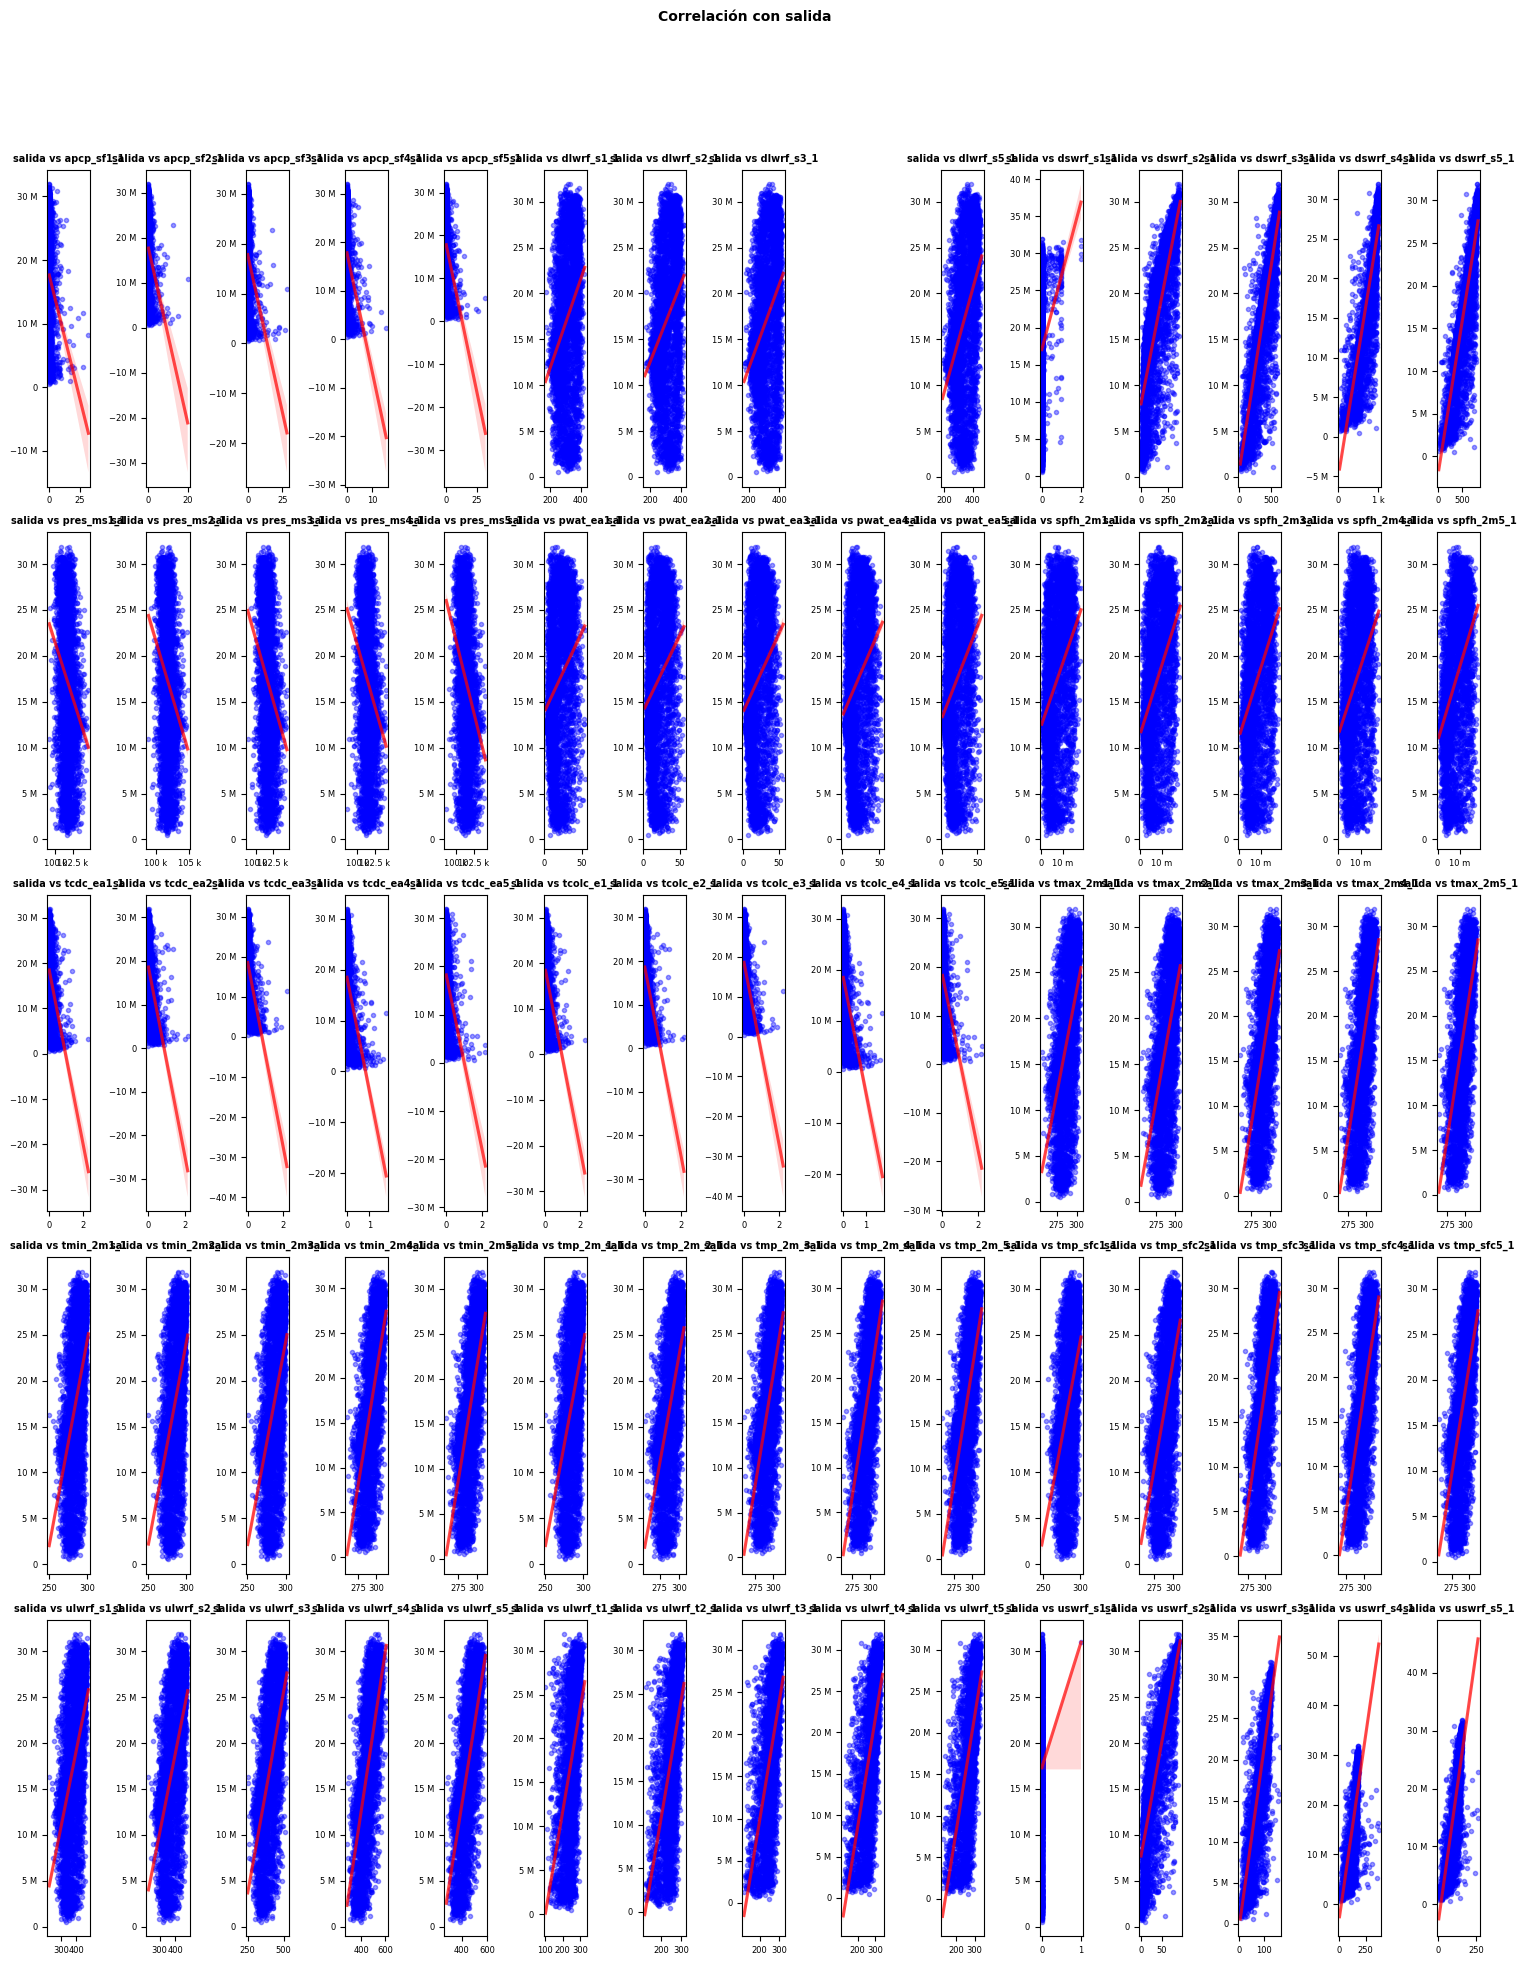

In [129]:
fig, axes = plt.subplots(nrows=5, ncols=15, figsize=(15, 20))
axes = axes.flat
columnas_numeric = disp_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('salida')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = disp_df[colum],
        y           = disp_df['salida'],
        color       = "blue",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"salida vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con salida', fontsize = 10, fontweight = "bold");

PDT INTERPRETACIÓN

## 5. Análisis de la Variable Independiente

### 5.1 Identificación de valores atípicos

<Axes: >

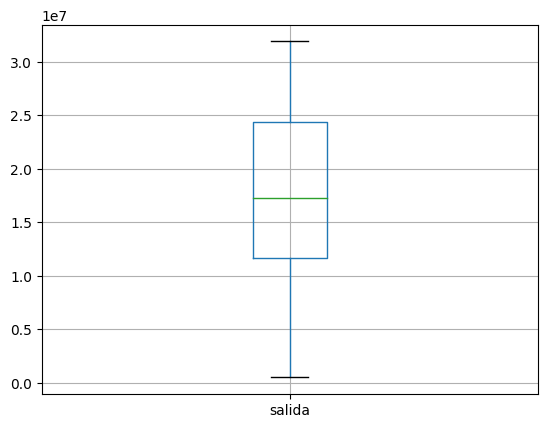

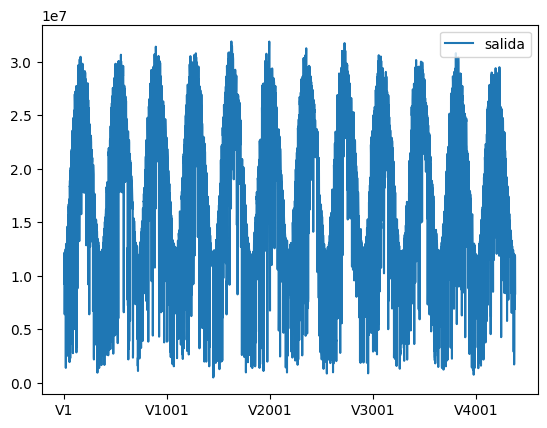

In [130]:
y = disp_df[['salida']]

y.boxplot(column="salida")

y.plot()

### 5.2 Análisis de distribución

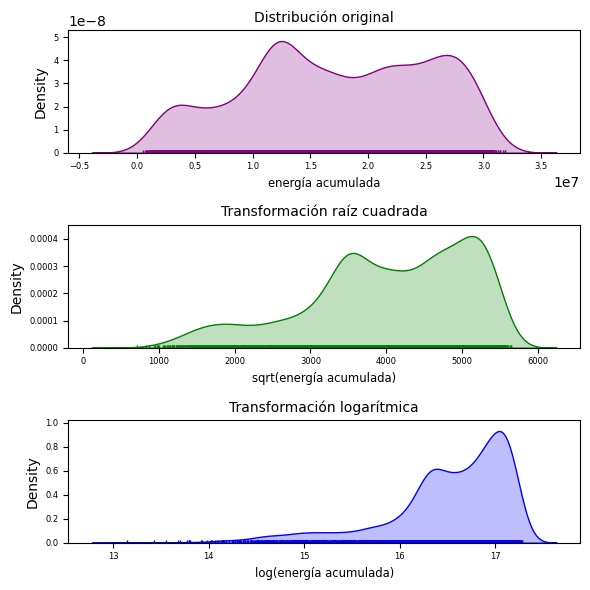

In [131]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    disp_df.salida,
    fill    = True,
    color   = "purple",
    ax      = axes[0]
)
sns.rugplot(
    disp_df.salida,
    color   = "purple",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('energía acumulada', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(disp_df.salida),
    fill    = True,
    color   = "green",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(disp_df.salida),
    color   = "green",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(energía acumulada)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(disp_df.salida),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(disp_df.salida),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(energía acumulada)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

Si nos fijamos en la distribución original, los datos no siguen una distribución normal lo que implica que los datos NO están distribuidos de manera simétrica alrededor de su media y que la mayoría de los datos NO se concentran cerca de la media. 

Por tanto, quizas una regresión lineal no se ajusta muy bien al modelo y debemos optar por modelos más complejos.

La transformación logaritmica parece acercar los datos un poco más a la distribució normal, es decir, reduce el sesgo y reduce la magnitud de los valores extremos.



Para saber que distribuciones se ajustarán mejor a nuestros datos:

Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  6.96it/s]


sumsquare_error          aic            bic    kl_div  ks_statistic  \
beta         1.092646e-14  3473.448075 -177498.341366  0.057128      0.034269   
powerlaw     1.595882e-14  3463.131521 -175847.476697  0.120297      0.064265   
norm         1.844984e-14  3497.238964 -175220.567823  0.093663      0.063533   
gamma        1.852071e-14  3499.428185 -175195.391677  0.094838      0.065996   
logistic     2.103529e-14  3505.782495 -174646.150841  0.106701      0.061870   
cauchy       3.165338e-14  3552.288200 -172856.291421  0.164756      0.126814   
expon        5.716219e-14  3518.150699 -170267.502896  0.382799      0.246126   
chi2         1.208182e-13          inf -166981.149826  4.150697      0.886986   
exponpow     1.208182e-13          inf -166981.149826       NaN      1.000000   

              ks_pvalue  
beta       6.644631e-05  
powerlaw   3.601827e-16  
norm       8.191345e-16  
gamma      4.972209e-17  
logistic   5.112762e-15  
cauchy     7.324820e-62  
expon     3.709518e-234  
chi2       0.000000e+00  
exponpow   0.000000e+00

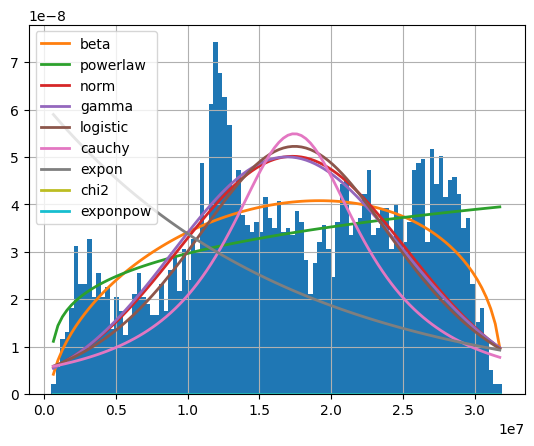

In [132]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(disp_df.salida, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=True)

*Interpretación*
Hemos generado un gráfico de probabilidad-quantil y probabilidad-densidad para poder observar que distribución se ajusta mejor a nuestros datos.

*   **Sumsquare_error**: Indica la cantidad total de la variación en los datos que no se explica por la distribución ajustada -> la más baja (mejor) es la **BETA**

SI la distribución Beta se ajusta mejor a los datos, entonces los parámetros alfa y beta estimados por el ajuste indicarán cómo se distribuyen los datos dentro del rango limitado de la variable respuesta. Por ejemplo, un valor alto de alfa y un valor bajo de beta pueden indicar que la mayoría de los valores están concentrados en la parte inferior del rango de la variable respuesta, mientras que un valor alto de beta y un valor bajo de alfa pueden indicar lo contrario.

*   **Aic**: Se basa en la idea de que un buen modelo debe ajustarse bien a los datos, pero no debe ser demasiado complejo. El menos complejo es la **POWERLAW**

*   **BIC (Bayesian Information Criterion)**: Tiene en cuenta tanto el ajuste de la distribución a los datos como la complejidad del modelo, pero penaliza más fuertemente los modelos más complejos que el AIC. EL mejor en este caso es la **distribución beta**.

*   **KL_Divergence:** Se utiliza para comparar dos distribuciones de probabilidad, en términos de la información que se pierde cuando se utiliza una distribución para aproximar a la otra.  EL mejor en este caso es la **distribución beta**.

*   ks_static: Comparar la distribución empírica de una muestra de datos con diferentes distribuciones teóricas ajustadas a los datos, la interpretación es la siguiente: cuanto mayor sea el valor de KS_static, mayor será la discrepancia entre la distribución empírica y la teórica, lo que indica que la distribución teórica no se ajusta bien a los datos observados.

*   p-value: Medida de la evidencia en contra de la hipótesis nula de que la muestra de datos proviene de la distribución teórica. Casi todas las distribuciones no se ajustan bien a la distribución teórica.

## 6. Eliminación de variables

uswrf_s1_1 (Flujo radiactivo de onda corta hacia arriba en la superficie) no está correlacionada con ninguna variable. Además, uswrf_s1_1 solo tiene 1 observación superior a 0 y su varianza es 0. Por lo que hemos decidido proceder a eliminarla:

In [133]:
disp_df.uswrf_s1_1.value_counts()

0    4379
1       1
Name: uswrf_s1_1, dtype: int64

In [134]:
disp_df = disp_df.drop('uswrf_s1_1', axis=1)

In [135]:
disp_df.shape

(4380, 75)

## 7. Separación en conjuntos

Seguirá la siguiente distribución:

*   Cojunto de entrenamiento [X_train, y_train] (8 años - aprox 2920 instancias)
*   Conjunto de validación [X_valid, y_valid] (2 años - aprox 730 instancias)
*   Conjunto de test [X_test, y_test] (2 años - aprox 730 instancias)

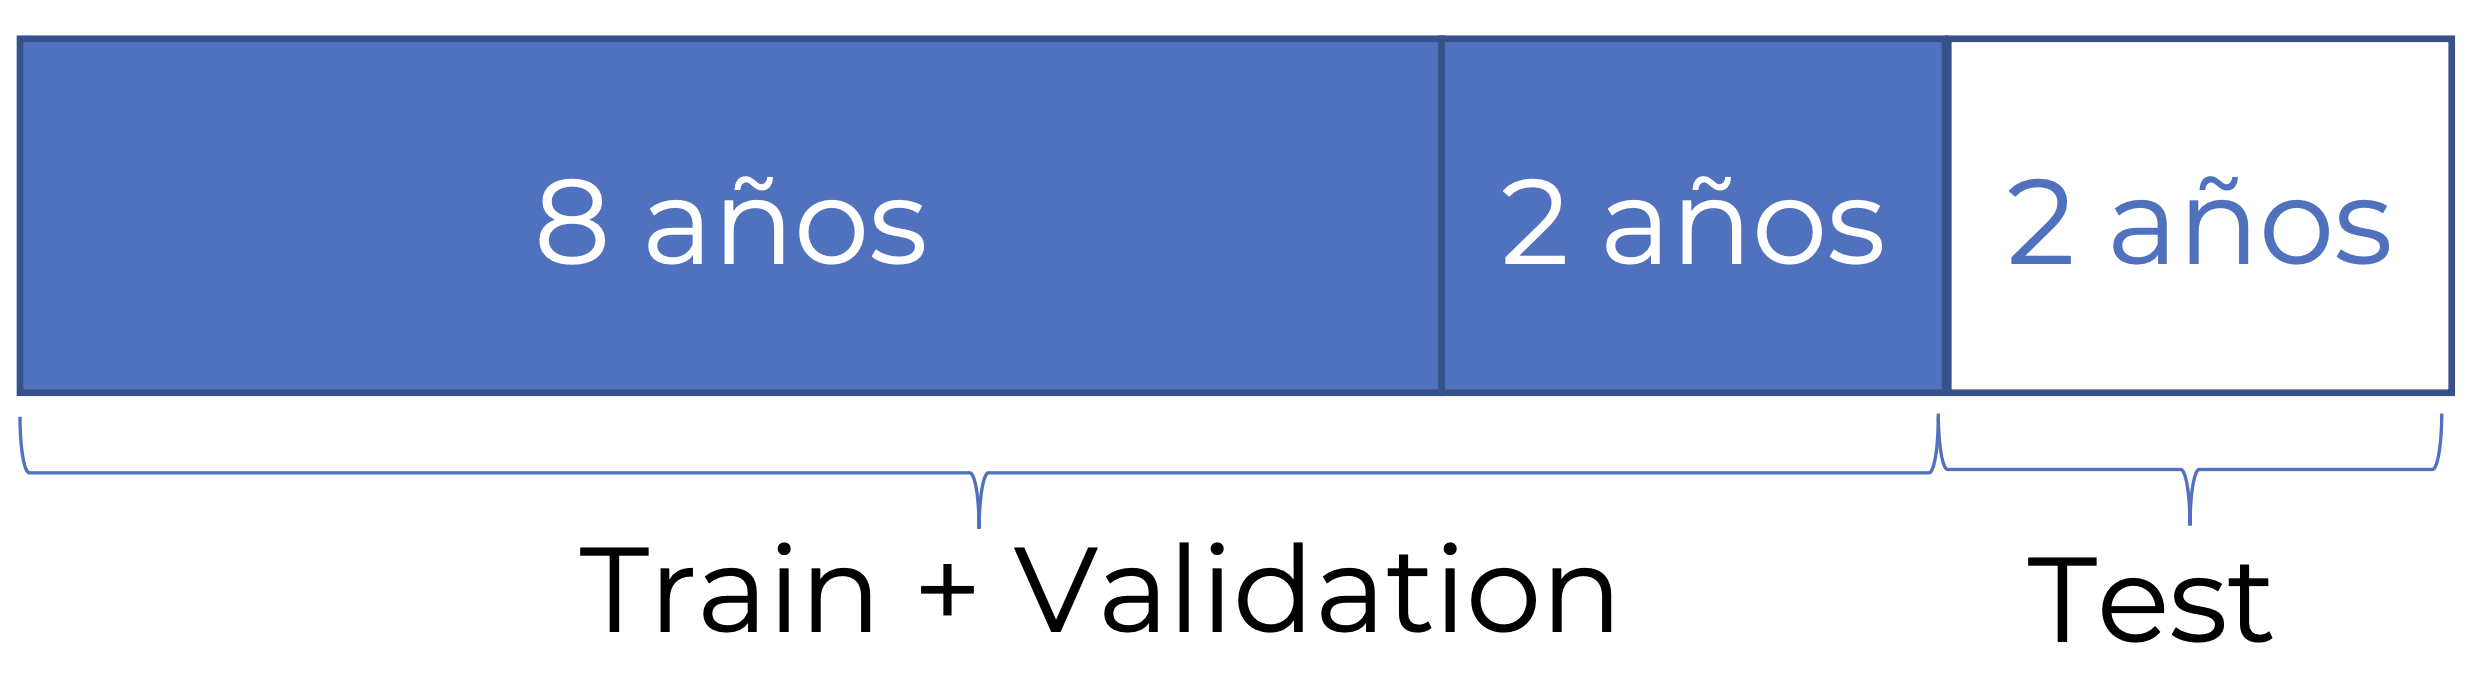

In [136]:
from sklearn.model_selection import train_test_split

X = disp_df.drop(columns = ['salida'])
y = disp_df[['salida']]

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.67, random_state=7)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=7)

## 8. Normalización / Estandarización de los datos


Estos procesos se emplean en la preparación de los datos para evitar que los modelos de aprendizaje supervisado se desvíen hacia un rango específico de valores, así como para evitar problemas como:

*  Pérdida de precisión
*  Aumento en el costo computacional


Sin embargo, en función del método a utilizar es conveniente emplear una opción u otra. Puesto que nuestro objetivo es obtener los mejores resultados, hemos decidido emplear para cada método la opción más recomendada. Siguiendo las indicaciones dadas en clase, no escalaremos/normalizaremos la salida.

### 8.1 Normalización de los datos aplicando Min Max
La normalización es útil cuando sus datos tienen escalas variables y el algoritmo que está utilizando no hace suposiciones sobre la distribución de sus datos, como:

*   KNN

In [137]:
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()

X_train_norm = sc_X.fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=disp_df.columns.values[:-1])

In [138]:
sc_X = MinMaxScaler()

X_valid_norm = sc_X.fit_transform(X_valid)
X_valid_norm = pd.DataFrame(X_valid_norm, columns=disp_df.columns.values[:-1])

### 8.2 Estandarización de los datos aplicando StandardScaler

La estandarización es útil cuando sus datos tienen escalas variables y el algoritmo que está utilizando hace suposiciones acerca de que sus datos tienen una distribución gaussiana, como:

*  Regresor Lineal
*  SVM's


In [139]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train_std = sc_X.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=disp_df.columns.values[:-1])

In [140]:
sc_X = StandardScaler()

X_valid_std = sc_X.fit_transform(X_valid)
X_valid_std = pd.DataFrame(X_valid_std, columns=disp_df.columns.values[:-1])

### 8.3 No necesitan normalización / estandarización
La normalización / estandarización no es importante para algoritmos que se escalan de forma invariable. La escala del valor de la función no afecta el rendimiento del modelo de los modelos entrenados con:

*   Árboles de regresión 
*   RandomForest
*   Gradient Boosting



# Métodos Básicos

1.   KNN
2.   Árboles de regresión
  1. Linear Tree Regressor
  2. Decision Tree Regressor
  
3.   Regresión lineal

## a. Evaluación de los modelos con los hiperparámetros por omisión

### KNN

In [141]:
from sklearn.neighbors import KNeighborsRegressor

start_time = time.time()

knn = KNeighborsRegressor()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
knn.fit(X_train_norm, y_train)

# Obtenemos las predicciones
y_pred_knn = knn.predict(X_valid_norm)

end_time = time.time()

# We compute accuracy
rmse_knn = np.sqrt(metrics.mean_squared_error(y_valid, y_pred_knn))
mae_knn = metrics.mean_absolute_error(y_valid, y_pred_knn)
r2_knn = metrics.r2_score(y_valid, y_pred_knn)
time_knn = end_time - start_time

print(f"RMSE of KNN: {rmse_knn}")
print(f"MAE of KNN: {mae_knn}")
print(f"R2 of KNN: {r2_knn}")
print(f"Time of KNN: {time_knn} \n")

RMSE of KNN: 3513465.072617365
MAE of KNN: 2358188.541078838
R2 of KNN: 0.8088229162771579
Time of KNN: 0.18347716331481934 



### Árboles de regresión

#### Linear Tree Regressor (Lineartree)

In [142]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

start_time = time.time()

linearTree = LinearTreeRegressor(base_estimator=LinearRegression())

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
linearTree.fit(X_train, y_train)

# Obtenemos las predicciones
y_pred_lrtree = linearTree.predict(X_valid)

end_time = time.time()

# We compute accuracy
rmse_lrtree = np.sqrt(metrics.mean_squared_error(y_valid, y_pred_lrtree))
mae_lrtree = metrics.mean_absolute_error(y_valid, y_pred_lrtree)
r2_lrtree = metrics.r2_score(y_valid, y_pred_lrtree)
time_lrtree = end_time - start_time

print(f"RMSE of the linear tree: {rmse_lrtree}")
print(f"MAE of the linear tree: {mae_lrtree}")
print(f"R2 of the linear tree: {r2_lrtree}")
print(f"Time of the linear tree: {time_lrtree} \n")

RMSE of the linear tree: 3971071.299537738
MAE of the linear tree: 2501083.8948824345
R2 of the linear tree: 0.7557807344338388
Time of the linear tree: 99.03544569015503 



#### Decision Tree Regressor (Sklearn)

In [143]:
from sklearn import tree

start_time = time.time()

regr = tree.DecisionTreeRegressor()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
regr.fit(X_train, y_train)

# Obtenemos las predicciones
y_pred_tree = regr.predict(X_valid)

end_time = time.time()

# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_valid, y_pred_tree))
mae_tree = metrics.mean_absolute_error(y_valid, y_pred_tree)
r2_tree = metrics.r2_score(y_valid, y_pred_tree)
time_tree = end_time - start_time

print(f"RMSE of the decision tree: {rmse_tree}")
print(f"MAE of the decision tree: {mae_tree}")
print(f"R2 of the decision tree: {r2_tree}")
print(f"Time of the decision tree: {time_tree} \n")

RMSE of the decision tree: 4631399.299787452
MAE of the decision tree: 3069212.1659751036
R2 of the decision tree: 0.6678081275416368
Time of the decision tree: 0.2522013187408447 



### Regresión lineal

In [144]:
from sklearn.linear_model import LinearRegression

start_time = time.time()

lr = LinearRegression()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
lr.fit(X_train_std, y_train)

# Obtenemos las predicciones
y_pred_lr = lr.predict(X_valid_std)

end_time = time.time()

# We compute accuracy
rmse_linear = np.sqrt(metrics.mean_squared_error(y_valid, y_pred_lr))
mae_linear = metrics.mean_absolute_error(y_valid, y_pred_lr)
r2_linear = metrics.r2_score(y_valid, y_pred_lr)
time_linear = end_time - start_time

print(f"RMSE of linear regression: {rmse_linear}")
print(f"MAE of linear regression: {mae_linear}")
print(f"R2 of linear regression: {r2_linear}")
print(f"Time of linear regression: {time_linear} \n")

RMSE of linear regression: 3151794.326827894
MAE of linear regression: 2203181.249615824
R2 of linear regression: 0.8461560966889282
Time of linear regression: 0.026308298110961914 



### Evaluación

In [145]:
method_list = [('KNN', rmse_knn, mae_knn, r2_knn, time_knn),
              ('Linear Tree Regressor', rmse_lrtree, mae_lrtree, r2_lrtree, time_lrtree),
              ('Decision Tree Regressor', rmse_tree, mae_tree, r2_tree, time_tree),
              ('Linear Regression', rmse_linear, mae_linear, r2_linear, time_linear)]

evaluation_df = pd.DataFrame(method_list, columns = ['Method', 'RMSE', 'MAE', 'R2', 'Time'])
evaluation_df

Method          RMSE           MAE        R2       Time
0                      KNN  3.513465e+06  2.358189e+06  0.808823   0.183477
1    Linear Tree Regressor  3.971071e+06  2.501084e+06  0.755781  99.035446
2  Decision Tree Regressor  4.631399e+06  3.069212e+06  0.667808   0.252201
3        Linear Regression  3.151794e+06  2.203181e+06  0.846156   0.026308

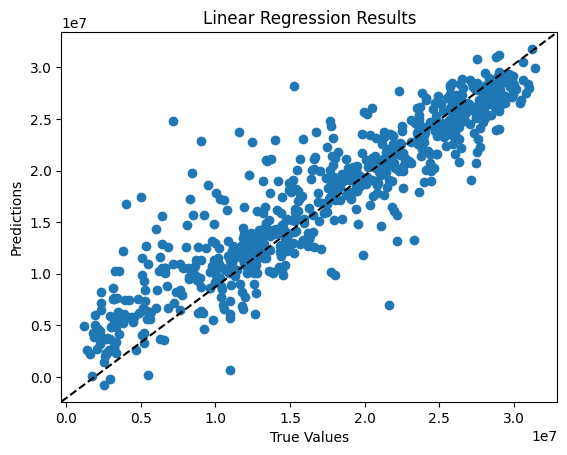

In [146]:
# Plotting the results
plt.scatter(y_valid, y_pred_lr)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Results')
plt.show()

MSE (Mean Squared Error): Cuanto menor sea el valor de MSE, mejor será el rendimiento del modelo. Un valor de MSE igual a cero indica que el modelo predice perfectamente los valores reales.

MAE (Mean Absolute Error): Cuanto menor sea el valor de MAE, mejor será el rendimiento del modelo. El MAE es más robusto que el MSE en presencia de valores atípicos porque no depende del cuadrado de los errores.

R2 (Coeficiente de determinación): El R2 varía de 0 a 1, donde un valor de 1 indica que el modelo explica toda la varianza en los valores de y y un valor de 0 indica que el modelo no explica nada de la varianza. En general, cuanto mayor sea el valor de R2, mejor será el rendimiento del modelo.

**El modelo que mejor se ajusta actualmente es el de regresión lineal**, ya que tiene los valores de RMSE, MAE más bajos y los de R2 más altos

## b. Ajuste de los hiperparámetros más importantes

### KNN

Los hiperparámetros más importantes son:


*   n_neighbors - Número de vecinos más próximos a tener en cuenta
*   weights - ['uniform' - los pesos son uniformes, 'distance' - la distancia influye en los pesos]
*   metric - ['minkowski', 'euclidean','manhattan'] Métodos para calcular la distancia con los vecinos

In [147]:
# Calculamos el accuracy del modelo para diferentes valores de n_neighbors
aux = np.zeros(100)

for i in range(1, 101):
  knn = KNeighborsRegressor(n_neighbors=i).fit(X_train_norm, y_train)
  np.random.seed(7)
  ypred = knn.predict(X_valid_norm)
  aux[i-1] = np.sqrt(metrics.mean_squared_error(y_valid, ypred))

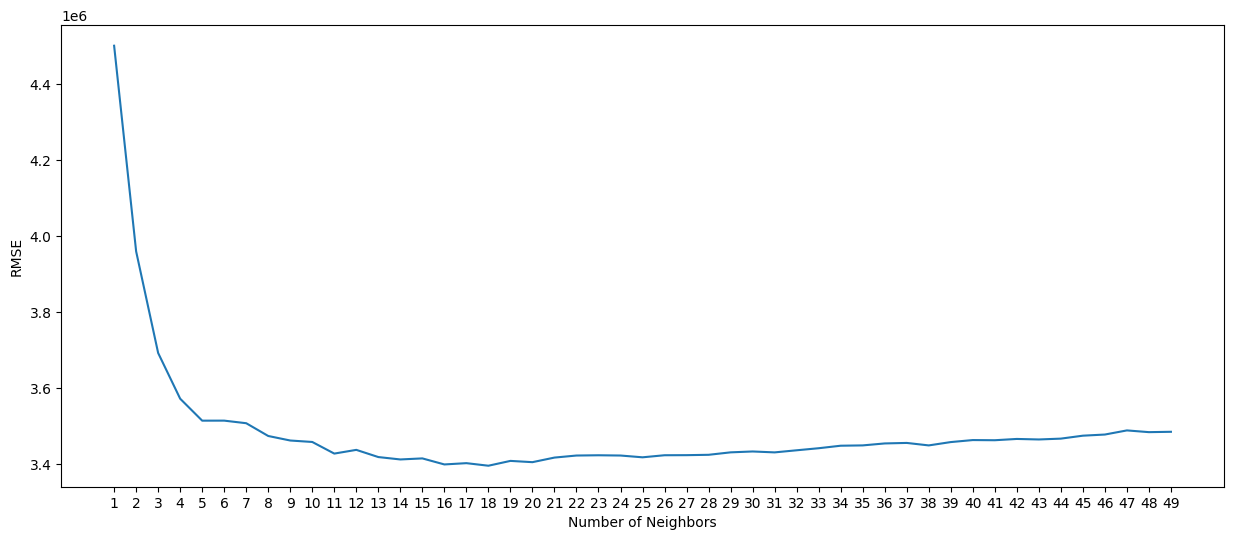

In [148]:
# Graficamos los resultados
loc = np.arange(1, 50, step=1.0)
plt.figure(figsize = (15, 6))
plt.plot(range(1, 50), aux[:49])
plt.xticks(loc)
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.show()

Observamos que el comportamiento del modelo a priori es mejor cuando n_neighbors toma los siguientes valores [11, 16, 18, 19, 20]

En la búsqueda por el ajuste de los hiperparámetros utilizaremos como método de búsqueda Grid-search, el cual nos da la posibilidad de concretar la lista de valores a probar

In [149]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : [11, 16, 18, 19, 20],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'euclidean','manhattan']}

gs = GridSearchCV(KNeighborsRegressor(), grid_params, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

In [150]:
g_res.best_score_
print(g_res.best_params_)

{'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}


Una vez obtenidos los hiperparámetros óptimos, comprobamos sus resultados en el modelo

In [151]:
start_time = time.time()

opt_knn = KNeighborsRegressor(n_neighbors = 16, weights = 'distance', metric = 'manhattan')

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

opt_knn.fit(X_train_norm, y_train)

opt_y_pred_knn = knn.predict(X_valid_norm)

end_time = time.time()

# We compute accuracy
opt_rmse_knn = np.sqrt(metrics.mean_squared_error(y_valid, opt_y_pred_knn))
opt_mae_knn = metrics.mean_absolute_error(y_valid, opt_y_pred_knn)
opt_r2_knn = metrics.r2_score(y_valid, opt_y_pred_knn)
opt_time_knn = end_time - start_time

print(f"RMSE of opt KNN: {opt_rmse_knn}")
print(f"MAE of opt KNN: {opt_mae_knn}")
print(f"R2 of opt KNN: {opt_r2_knn}")
print(f"Time of opt KNN: {opt_time_knn} \n")

RMSE of opt KNN: 3610037.475597199
MAE of opt KNN: 2536627.181078838
R2 of opt KNN: 0.7981689535455707
Time of opt KNN: 0.14474964141845703 



### Árboles de regresión

#### Decision Tree Regressor (Sklearn)

Los hiperparámetros más importantes son:

*   max_deph - Máxima profundidad del árbol
*   min_samples_leaf
*   ccp_alpha


In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

# Tomamos un valor de alpha entre 10^-10 y 1. Usamos un barrido logaritmico.
for alpha in np.logspace(-10, 0, 11):

    dtr = DecisionTreeRegressor(ccp_alpha = alpha)

    # Calculamos los scores al hacer cross-validation con 5 folds 
    scores = cross_val_score(dtr, X_train, y_train, cv = 5)

    # Imprimimos el valor de alpha y el score medio
    print('Valor de alpha {} - Score medio = {}'.format(alpha, scores.mean()))

Valor de alpha 1e-10 - Score medio = 0.6361496672864622
Valor de alpha 1e-09 - Score medio = 0.6476396043232187
Valor de alpha 1e-08 - Score medio = 0.6517721662170735
Valor de alpha 1e-07 - Score medio = 0.6558081792407129
Valor de alpha 1e-06 - Score medio = 0.6461945390501647
Valor de alpha 1e-05 - Score medio = 0.6472246178320661
Valor de alpha 0.0001 - Score medio = 0.6476774938356249
Valor de alpha 0.001 - Score medio = 0.6466777424527198
Valor de alpha 0.01 - Score medio = 0.6425906834055152
Valor de alpha 0.1 - Score medio = 0.6499401798407618
Valor de alpha 1.0 - Score medio = 0.6511054115537199


Vemos que con alpha = 0.001 tenemos un buen score, lo que nos podrá prevenir de hacer overfitting

In [153]:
dtr = DecisionTreeRegressor(ccp_alpha = 0.0001)

dtr.fit(X_train, y_train)

depth = dtr.get_depth()
print('Profundidad del árbol = {}'.format(depth))

score_in_test = dtr.score(X_valid, y_valid)
print('Score: {}'.format(score_in_test))

Profundidad del árbol = 32
Score: 0.6500788268835485


In [154]:
from sklearn.model_selection import GridSearchCV

grid_params = {'max_depth': [7, 20, 50, 100],
               'min_samples_leaf': [10, 20, 50, 100]}

gs_tree = GridSearchCV(DecisionTreeRegressor(), grid_params, cv=5, n_jobs = -1)

g_res_tree = gs_tree.fit(X_train, y_train)

In [155]:
g_res_tree.best_score_
print(g_res_tree.best_params_)

{'max_depth': 7, 'min_samples_leaf': 20}


In [156]:
start_time = time.time()

opt_dtr = DecisionTreeRegressor(max_depth=32, min_samples_leaf=32, ccp_alpha=0.0001, random_state=7)

# Entrenamos
opt_dtr.fit(X_train, y_train)

# Obtenemos las predicciones
opt_y_pred_tree = opt_dtr.predict(X_valid)

end_time = time.time()

# We compute accuracy
opt_rmse_tree = np.sqrt(metrics.mean_squared_error(y_valid, opt_y_pred_tree))
opt_mae_tree = metrics.mean_absolute_error(y_valid, opt_y_pred_tree)
opt_r2_tree = metrics.r2_score(y_valid, opt_y_pred_tree)
opt_time_tree = end_time - start_time

print(f"RMSE of the opt decision tree: {opt_rmse_tree}")
print(f"MAE of the opt decision tree: {opt_mae_tree}")
print(f"R2 of the opt decision tree: {opt_r2_tree}")
print(f"Time of the opt decision tree: {opt_time_tree} \n")

RMSE of the opt decision tree: 3564380.1241216594
MAE of the opt decision tree: 2439607.3350729155
R2 of the opt decision tree: 0.8032419191564439
Time of the opt decision tree: 0.11829066276550293 



### Regresión lineal

Los hiperparámetros más importantes son:

*   Alpha
*   Normalize

Para ajustar los hiperparámetros se utilizan técnicas de validación cruzada como GridSearchCV o RandomizedSearchCV. En el caso de LinearRegression de scikit-learn, no hay hiperparámetros que ajustar ya que se trata de un modelo lineal simple que encuentra la mejor combinación de coeficientes para minimizar el error cuadrático medio en el conjunto de entrenamiento. 

Por ello, se harán pruebas sobre otros modelos lineales que tienen hiperparámetros para ajustar, como la **Regresión Ridge y la de Lasso.**


#### Regresión Ridge

In [86]:
# Checking for alpha from .0001 to 1 and finding the best value for alpha
alpha_space = np.logspace(-4, 0, 30)
alpha_space

array([1.00000000e-04, 1.37382380e-04, 1.88739182e-04, 2.59294380e-04,
       3.56224789e-04, 4.89390092e-04, 6.72335754e-04, 9.23670857e-04,
       1.26896100e-03, 1.74332882e-03, 2.39502662e-03, 3.29034456e-03,
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00])

In [87]:
from sklearn.linear_model import RidgeCV

modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,      
            store_cv_values = True
         )

_ = modelo.fit(X = X_train_std, y = y_train)

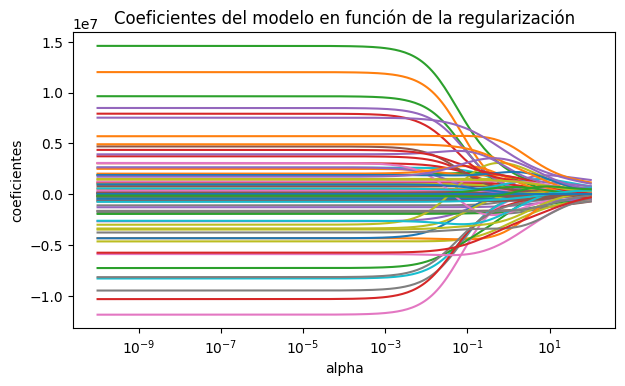

In [88]:
from sklearn.linear_model import Ridge


alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train_std, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

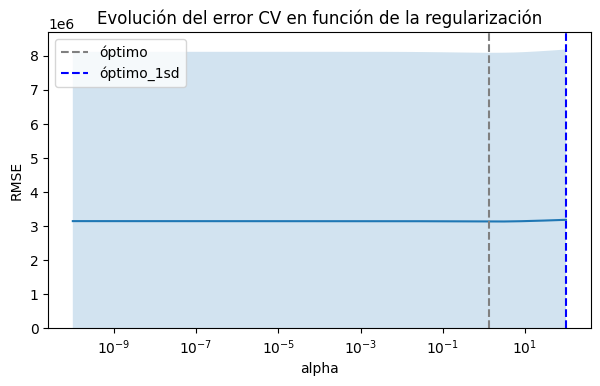

In [89]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0, None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [90]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1.350993521198025


In [91]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge(alpha=modelo.alpha_)
ridge.fit(X_train_std, y_train)
r2 = ridge.score(X_valid_std, y_valid)

print(r2)

0.8449180810067318


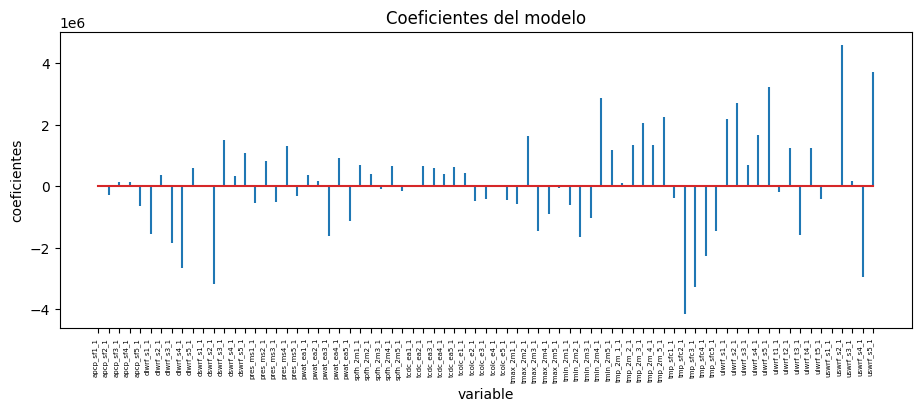

In [93]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_std.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

PDT INTERPRETACION

#### Regresión de Lasso

In [94]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error

from sklearn.linear_model import LassoCV

modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),            
            cv              = 10
         )
_ = modelo.fit(X = X_train_std, y = y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8843870666141596.0, tolerance: 16456213565785.94
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5984966640186026.0, tolerance: 16456213565785.94
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did no

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.337e+17, tolerance: 1.066e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.487e+17, tolerance: 1.066e+14
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.618e+17, tolerance: 1.066e+14

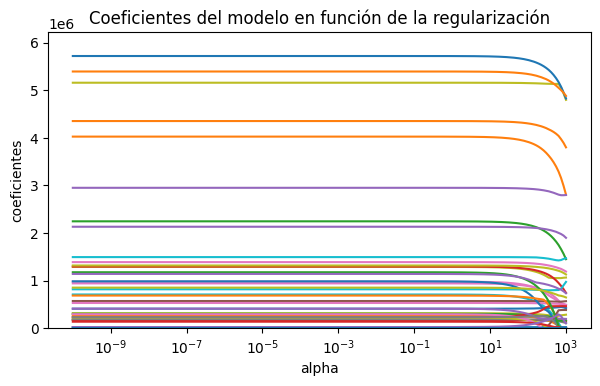

In [95]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
from sklearn.linear_model import Lasso

alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train_std, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-1,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

INTERPRETACIÓN: A medida que se acerca a 0 converge

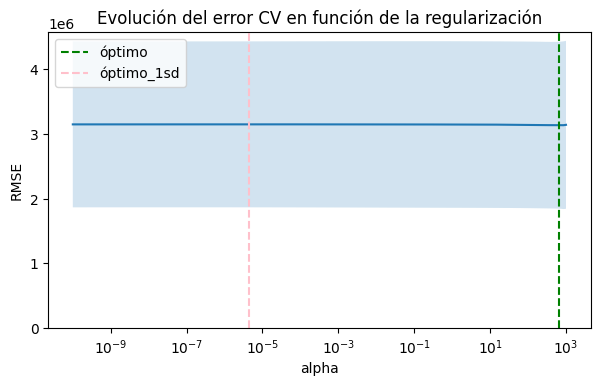

In [96]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "green",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "pink",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [97]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 636.8249944718613


In [98]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

lasso = Lasso(alpha=modelo.alpha_)
lasso.fit(X_train_std, y_train)

r2 = lasso.score(X_valid_std, y_valid)

print("Coeficiente de determinación R²: {:.2f}".format(r2))

Coeficiente de determinación R²: 0.84


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+16, tolerance: 1.823e+13
  model = cd_fast.enet_coordinate_descent(


In [99]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [4.34701316e-06]


TypeError: ignored

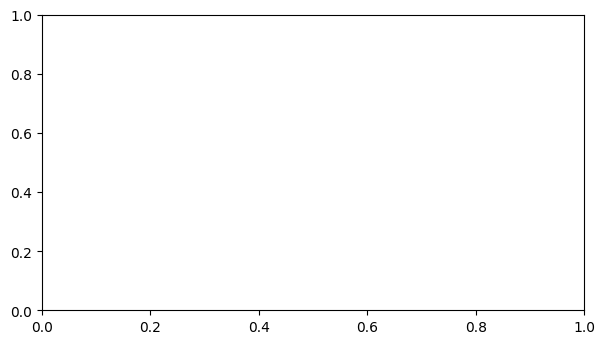

In [100]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso'],
                    #'test rmse': [min_rmse, min_rmse]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

INTERPRETACIÓN

### Evaluación

In [ ]:
method_list_opt = [('KNN óptimo', opt_rmse_knn, opt_mae_knn, opt_r2_knn, opt_time_knn),
              ('Decision Tree Regressor óptimo', opt_rmse_tree, opt_mae_tree, opt_r2_tree, opt_time_tree),
              ('Regresión Ridge', 'FALTA', 'FALTA', 'FALTA', 'FALTA'),
              ('Regresión Lasso', 'FALTA', 'FALTA', 'FALTA', 'FALTA'),]

evaluation_df_opt = pd.DataFrame(method_list_opt, columns = ['Method', 'RMSE', 'MAE', 'R2', 'Time'])
evaluation_df_opt

PDT INTERPRETAR

##c. Conclusiones finales

#### Comparativa entre los modelos con hiperparámetros por omisión y óptimos

In [157]:
method_list_final = [('KNN por omisión', rmse_knn, mae_knn, r2_knn, time_knn),
                     ('KNN óptimo', opt_rmse_knn, opt_mae_knn, opt_r2_knn, opt_time_knn),
                     ('Decision Tree Regressor por omisión', rmse_tree, mae_tree, r2_tree, time_tree),
                     ('Decision Tree Regressor óptimo', opt_rmse_tree, opt_mae_tree, opt_r2_tree, opt_time_tree),
                     ('Linear Regression', rmse_linear, mae_linear, r2_linear, time_linear),
                     ('Regresión Ridge', 'FALTA', 'FALTA', 'FALTA', 'FALTA'),
                     ('Regresión Lasso', 'FALTA', 'FALTA', 'FALTA', 'FALTA')]

evaluation_df_final = pd.DataFrame(method_list_final, columns = ['Method', 'RMSE', 'MAE', 'R2', 'Time'])
evaluation_df_final

Method            RMSE             MAE  \
0                      KNN por omisión  3513465.072617  2358188.541079   
1                           KNN óptimo  3610037.475597  2536627.181079   
2  Decision Tree Regressor por omisión  4631399.299787  3069212.165975   
3       Decision Tree Regressor óptimo  3564380.124122  2439607.335073   
4                    Linear Regression  3151794.326828  2203181.249616   
5                      Regresión Ridge           FALTA           FALTA   
6                      Regresión Lasso           FALTA           FALTA   

         R2      Time  
0  0.808823  0.183477  
1  0.798169   0.14475  
2  0.667808  0.252201  
3  0.803242  0.118291  
4  0.846156  0.026308  
5     FALTA     FALTA  
6     FALTA     FALTA

INTERPRETACIÓN

#### Comparativa con Regresores Triviales

*   DummyRegressor - Perteneciente a librería de sklearn sirve como base para la comparación con otros regresores

In [159]:
from sklearn.dummy import DummyRegressor

start_time = time.time()

dummy_regr = DummyRegressor()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
dummy_regr.fit(X_train, y_train)

# Obtenemos las predicciones
y_dummy = dummy_regr.predict(X_valid)

end_time = time.time()

# We compute accuracy
rmse_dummy = np.sqrt(metrics.mean_squared_error(y_valid, y_dummy))
mae_dummy = metrics.mean_absolute_error(y_valid, y_dummy)
r2_dummy = metrics.r2_score(y_valid, y_dummy)
time_dummy = end_time - start_time

print(f"RMSE of KNN: {rmse_dummy}")
print(f"MAE of KNN: {mae_dummy}")
print(f"R2 of KNN: {r2_dummy}")
print(f"Time of KNN: {time_dummy} \n")

RMSE of KNN: 8035996.611558561
MAE of KNN: 6924302.761901529
R2 of KNN: -0.00010141379365680159
Time of KNN: 0.0025987625122070312 



Comparativa de los resultados obtenidos con el regresor trivial y el mejor modelo:

In [160]:
method_list_d = [('Dummy Regressor', rmse_dummy, mae_dummy, r2_dummy, time_dummy),
              ('Mejor Modelo', 'FALTA', 'FALTA', 'FALTA', 'FALTA')]

comparative_df_d = pd.DataFrame(method_list_d, columns = ['Method', 'RMSE', 'MAE', 'R2', 'Time'])
comparative_df_d

Method            RMSE             MAE        R2      Time
0  Dummy Regressor  8035996.611559  6924302.761902 -0.000101  0.002599
1     Mejor Modelo           FALTA           FALTA     FALTA     FALTA

INTERPRETACIÓN

#### Tras el análisis realizado obtenemos que:


*   El mejor método es PENDIENTE DE TERMINAR
*   El método de aprendizaje más rápido es PENDIENTE DE TERMINAR
*   El ajuste de hiperparámetros en términos generales ha representado mejoras en los resultados de los modelos.

Equilibrio entre tiempo y mejora PENDIENTE DE TERMINAR

# Reducción de la dimensionalidad

Un aspecto clave es que la salida representa la energía eléctrica ***acumulada*** producida durante el día. Mientras que todos los datos con los que contamos representan datos captados en un instante de tiempo

## PCA (Principal Component Analysis)

Se trata de un método estadístico empleado con el objetivo de reducir la dimensionalidad del problema con el que estamos trabajando. Se basa en reducir el número de variables originales (X1, X2,...,Xn) a un número menor de variables (CP1, CP2,...,CPp), denominadas componentes principales.

Los componentes principales son una combinación lineal de las variables iniciales y sintetizan la mayor parte de la información contenida en los datos originales (varianza total).

In [189]:
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
scaler.fit(X)

X_pca = scaler.transform(X)
X_pca = pd.DataFrame(X_pca, columns=disp_df.columns.values[:-1])

In [ ]:
pca = PCA()
pca.fit(X_pca)

In [191]:
X_proj = pca.transform(X_pca)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 75)])

In [192]:
explainedVariance = X_proj.std()**2 / ((X.std()**2).sum())

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(75))
plt.xlabel('Componente Principal'); plt.ylabel('% Varianza explicada');

In [194]:
sum = aux = 0
varianzaBuscada = 0.985

for i in explainedVariance:
  if sum < varianzaBuscada:
    sum += i
    aux += 1

print("Para obtener un % de varianza explicada superior al " + str(varianzaBuscada*100) + " % necesitaremos " + str(aux) + " Componentes Principales")
print("Reduciendo de 75 a " + str(aux) + " variables la Varianza Total Explicada será " + str(round(sum*100, 2)) + " %")

Para obtener un % de varianza explicada superior al 98.5 % necesitaremos 15 Componentes Principales
Reduciendo de 75 a 15 variables la Varianza Total Explicada será 98.65 %


Con el resultado obtenido, para una Varianza Total Explicada superior a 98.5% el número de Componentes Principales será de 15.

Pasamos a entrenar el modelo con las nuevas modificaciones.

In [200]:
nPC = 15
pca = PCA(n_components=nPC).fit(X_pca)
X_proj = pd.DataFrame(pca.transform(X_pca), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

In [201]:
X_train_pca, X_rem_pca, y_train_pca, y_rem_pca = train_test_split(X_proj, y, train_size=0.67, random_state=7)

X_valid_pca, X_test_pca, y_valid_pca, y_test_pca = train_test_split(X_rem_pca, y_rem_pca, test_size=0.5, random_state=7)

In [202]:
from sklearn.linear_model import LinearRegression

start_time = time.time()

lr = LinearRegression()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
lr.fit(X_train_pca, y_train_pca)

# Obtenemos las predicciones
y_test_lr = lr.predict(X_test_pca)

end_time = time.time()

# We compute accuracy
rmse_linear = np.sqrt(metrics.mean_squared_error(y_test_pca, y_test_lr))
mae_linear = metrics.mean_absolute_error(y_test_pca, y_test_lr)
r2_linear = metrics.r2_score(y_test_pca, y_test_lr)
time_linear = end_time - start_time

print(f"RMSE of linear regression: {rmse_linear}")
print(f"MAE of linear regression: {mae_linear}")
print(f"R2 of linear regression: {r2_linear}")
print(f"Time of linear regression: {time_linear} \n")

RMSE of linear regression: 3332614.80577295
MAE of linear regression: 2396646.718095086
R2 of linear regression: 0.8337370629451024
Time of linear regression: 0.018095016479492188 



# Métodos avanzados

1.   SVMs
  1. SVR
  2. NuSVR
  3. LinearSVR
  
2.   Random Forests
3.   Gradient Boosting

##a. Evaluación de los modelos con los hiperparámetros por omisión

### SVM's 

Sklearn tiene hasta tres implementaciones distantes del algoritmo Suport Vector Machine

#### SVR (Support Vector Regression)

In [17]:
from sklearn.svm import SVR

start_time = time.time()

svr = SVR()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
svr.fit(X_train_std, y_train.values.ravel())

y_svr = svr.predict(X_valid_std)

end_time = time.time()

# We compute accuracy
rmse_svr = np.sqrt(metrics.mean_squared_error(y_valid, y_svr))
mae_svr = metrics.mean_absolute_error(y_valid, y_svr)
r2_svr = metrics.r2_score(y_valid, y_svr)
time_svr = end_time - start_time

print(f"RMSE of SVR: {rmse_svr}")
print(f"MAE of SVR: {mae_svr}")
print(f"R2 of SVR: {r2_svr}")
print(f"Time of SVR: {time_svr} \n")

RMSE of SVR: 8035489.431515442
MAE of SVR: 6925495.804073197
R2 of SVR: 2.482206633835915e-05
Time of SVR: 1.0181035995483398 



#### NuSVR (Nu Support Vector Regression)

Emplea Nu como parámetro de control del número de vectores de soporte.

In [18]:
from sklearn.svm import NuSVR

start_time = time.time()

nsvr = NuSVR()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
nsvr.fit(X_train_std, y_train.values.ravel())

y_nsvr = nsvr.predict(X_valid_std)

end_time = time.time()

# We compute accuracy
rmse_nsvr = np.sqrt(metrics.mean_squared_error(y_valid, y_nsvr))
mae_nsvr = metrics.mean_absolute_error(y_valid, y_nsvr)
r2_nsvr = metrics.r2_score(y_valid, y_nsvr)
time_nsvr = end_time - start_time

print(f"RMSE of NuSVR: {rmse_nsvr}")
print(f"MAE of NuSVR: {mae_nsvr}")
print(f"R2 of NuSVR: {r2_nsvr}")
print(f"Time of NuSVR: {time_nsvr} \n")

RMSE of NuSVR: 8068034.313452975
MAE of NuSVR: 6935502.572015388
R2 of NuSVR: -0.00809166628513136
Time of NuSVR: 0.6535780429840088 



#### LinearSVR

In [19]:
from sklearn.svm import LinearSVR

start_time = time.time()

lrsvr = LinearSVR()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
lrsvr.fit(X_train_std, y_train.values.ravel())

y_lrsvr = lrsvr.predict(X_valid_std)

end_time = time.time()

# We compute accuracy
rmse_lrsvr = np.sqrt(metrics.mean_squared_error(y_valid, y_lrsvr))
mae_lrsvr = metrics.mean_absolute_error(y_valid, y_lrsvr)
r2_lrsvr = metrics.r2_score(y_valid, y_lrsvr)
time_lrsvr = end_time - start_time

print(f"RMSE of LinearSVR: {rmse_lrsvr}")
print(f"MAE of LinearSVR: {mae_lrsvr}")
print(f"R2 of LinearSVR: {r2_lrsvr}")
print(f"Time of LinearSVR: {time_lrsvr} \n")

RMSE of LinearSVR: 19048819.39787079
MAE of LinearSVR: 17270982.232365146
R2 of LinearSVR: -4.619538873925298
Time of LinearSVR: 0.024937152862548828 



### Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

start_time = time.time()

modelRF = RandomForestRegressor()

# Utilizamos como semilla el número de nuestro grupo
np.random.seed(7)

# Entrenamos
modelRF.fit(X_train, y_train.values.ravel())

y_predRF = modelRF.predict(X_valid)

end_time = time.time()

# We compute accuracy
rmse_rf = np.sqrt(metrics.mean_squared_error(y_valid, y_predRF))
mae_rf = metrics.mean_absolute_error(y_valid, y_predRF)
r2_rf = metrics.r2_score(y_valid, y_predRF)
time_rf = end_time - start_time

print(f"RMSE of Random Forest: {rmse_rf}")
print(f"MAE of Random Forest: {mae_rf}")
print(f"R2 of Random Forest: {r2_rf}")
print(f"Time of Random Forest: {time_rf} \n")

RMSE of Random Forest: 3175192.757781135
MAE of Random Forest: 2168053.3447302906
R2 of Random Forest: 0.8438633913895761
Time of Random Forest: 17.76428985595703 



### Gradient Boosting

In [83]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

start_time = time.time()

boosting = HistGradientBoostingRegressor(random_state=7)

# Entrenamos
boosting.fit(X_train, y_train.values.ravel())

y_boosting = boosting.predict(X_valid)

end_time = time.time()

# We compute accuracy
rmse_bo = np.sqrt(metrics.mean_squared_error(y_valid, y_boosting))
mae_bo = metrics.mean_absolute_error(y_valid, y_boosting)
r2_bo = metrics.r2_score(y_valid, y_boosting)
time_bo = end_time - start_time

print(f"RMSE of Gradient Boosting: {rmse_bo}")
print(f"MAE of Gradient Boosting: {mae_bo}")
print(f"R2 of Gradient Boosting: {r2_bo}")
print(f"Time of Gradient Boosting: {time_bo} \n")

RMSE of Gradient Boosting: 3161780.3151504
MAE of Gradient Boosting: 2133489.2652065842
R2 of Gradient Boosting: 0.8451796895986352
Time of Gradient Boosting: 9.112647771835327 



### Evaluación

In [20]:
method_list = [('SVR', rmse_svr, mae_svr, r2_svr, time_svr),
              ('NuSVR', rmse_nsvr, mae_nsvr, r2_nsvr, time_nsvr),
              ('Linear SVR', rmse_lrsvr, mae_lrsvr, r2_lrsvr, time_lrsvr),
              ('Random Forest', rmse_rf, mae_rf, r2_rf, time_rf),
              ('Gradient Boosting', rmse_bo, mae_bo, r2_bo, time_bo)]

evaluation_df_av = pd.DataFrame(method_list, columns = ['Method', 'RMSE', 'MAE', 'R2', 'Time'])
evaluation_df_av

Method          RMSE           MAE        R2       Time
0                SVR  8.035489e+06  6.925496e+06  0.000025   1.018104
1              NuSVR  8.068034e+06  6.935503e+06 -0.008092   0.653578
2         Linear SVR  1.904882e+07  1.727098e+07 -4.619539   0.024937
3      Random Forest  3.175193e+06  2.168053e+06  0.843863  17.764290
4  Gradient Boosting  3.161780e+06  2.133489e+06  0.845180   5.229553

Tras el análisis observamos:

*   Los resultados con los SVM's para sus hiperparámetros por omisión no se ajustan lo suficiente al modelo para obtener buenos resultados.
*   Tanto Random Forest como Gradient Boosting ya obtienen mejores resultados que el mejor de los modelos de métodos básicos.

## b. Ajuste de los hiperparámetros más importantes

### SVM's

### Random Forest

Los hiperparámetros más importantes son:

*   n_estimators: el número de árboles en el bosque.
*   max_depth: la profundidad máxima de cada árbol.
*   min_samples_split: el número mínimo de muestras requeridas para dividir un nodo interno.
*   min_samples_leaf: el número mínimo de muestras requeridas en un nodo hoja.




Es un algoritmo de aprendizaje automático que se utiliza tanto para tareas de clasificación como de regresión. El concepto básico detrás de los bosques aleatorios es crear una gran cantidad de árboles de decisión individuales, cada uno entrenado con diferentes subconjuntos de datos y características aleatorias. Luego, se promedian las predicciones de todos los árboles individuales para producir una predicción final.

Random Forest con n_estimators = 100

In [231]:
rf = RandomForestRegressor(n_estimators=100, random_state=7)

rf.fit(X_train, y_train.values.ravel())

y_rf = rf.predict(X_valid)

rmse_rf_opt = np.sqrt(metrics.mean_squared_error(y_valid, y_rf))
mae_rf_opt = metrics.mean_absolute_error(y_valid, y_rf)
r2_rf_opt = metrics.r2_score(y_valid, y_rf)

print(f"RMSE of Random Forest: {rmse_rf_opt}")
print(f"MAE of Random Forest: {mae_rf_opt}")
print(f"R2 of Random Forest: {r2_rf_opt}")

RMSE of Random Forest: 3188243.6560397167
MAE of Random Forest: 2175516.673692946
R2 of Random Forest: 0.842577226457482


In [ ]:
# NO COMPILA
tree = rf.estimators_[i].tree_
print('La profundidad máxima del árbol es: {}'.format(tree.max_depth))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los valores a probar para cada hiperparámetro
param_grid = [
{'n_estimators': [10, 20], 'max_features': [5, 20], 
 'max_depth': [10, 28, None], 'bootstrap': [True, False]}
]

# Crear un modelo de Random Forest
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros: ", grid_search.best_params_)
print("Mejor score: ", grid_search.best_score_)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [236]:
#find the best model of grid search
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=28, max_features=5,
                      n_estimators=20)

Eliminamos las filas que contengan un valor igual a cero antes de calcular el porcentaje de error. 

In [ ]:
# NO COMPILA
# Eliminar filas con valores igual a cero
nonzero_indices = y_train != 0
y_trainRF_nonzero = y_train[nonzero_indices]
grid_best_nonzero = grid_search.best_estimator_.predict(X_train[nonzero_indices])

# Calcular MAPE para valores no nulos
errors = abs(grid_best_nonzero - y_trainRF_nonzero)
mape = np.mean(100 * (errors / y_trainRF_nonzero))

# Calcular y mostrar precisión para valores no nulos
accuracy = 100 - mape
print('The best model from grid-search has an accuracy of', round(accuracy, 2), '%')

In [ ]:
# NO COMPILA
grid_rmse = np.sqrt(metrics.mean_squared_error(y_train, grid_best))
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

#### Randomized Search.

Como Random Forest es muy costoso computacionalmente, también hemos decidido hacer un Randomized Search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=7, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.20730215239264324 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.20715237368097839 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.10813936871006367 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.11049571769279128 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.20704301824168173 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.10792364369835424 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.1077368544256213 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.10932455093160577 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.20761357552587742 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.10799197838764094 {'n_estimators': 110, 

In [ ]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155)

In [ ]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155)

In [ ]:
# Eliminar filas con valores igual a cero
nonzero_indices = y_train != 0
y_train_nonzero = y_train[nonzero_indices]
random_best_nonzero = rf_random.best_estimator_.predict(X_train[nonzero_indices])

# Calcular MAPE para valores no nulos
errors = abs(random_best_nonzero - y_train_nonzero)
mape = np.mean(100 * (errors / y_train_nonzero))

# Calcular y mostrar precisión para valores no nulos
accuracy = 100 - mape
print('The best model from the randomized search has an accuracy of', round(accuracy, 2), '%')

The best model from the randomized search has an accuracy of 85.5 %


In [ ]:
#this is the RMSE
final_rmse = np.sqrt(metrics.mean_squared_error(y_train, random_best))
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.05


RF accuracy de 88,34%
Randomized search del 85,5%

### Gradient Boosting

Los hiperparámetros más importantes son:

- learning_rate: reduce la contribución de cada árbol multiplicando su influencia original por este valor.
- max_iter: El número máximo de iteraciones del proceso de boosting, es decir, el número máximo de árboles.
- max_depth: profundidad máxima que pueden alcanzar los árboles.
- min_samples_split: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento `ceil(min_samples_split * n_samples)`.
- min_samples_leaf: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento `ceil(min_samples_split * n_samples)`.
- validation_fraction: proporción de datos separados del conjunto entrenamiento y empleados como conjunto de validación para determinar la parada temprana (*early stopping*).
- n_iter_no_change: número de iteraciones consecutivas en las que no se debe superar el tol para que el algoritmo se detenga (*early stopping*). Si su valor es None se desactiva la parada temprana.
- tol: porcentaje mínimo de mejora entre dos iteraciones consecutivas por debajo del cual se considera que el modelo no ha mejorado.


In [102]:
from sklearn.model_selection import RandomizedSearchCV, KFold

param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }

inner = KFold(n_splits=5, shuffle=True, random_state=7)

budget = 24
# Cross-validation (5-fold) para la búsqueda de hiper-parámetros
regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 7,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_mean_squared_error',
                           cv=inner,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           n_iter=budget,
                           return_train_score=True)

np.random.seed(7)
regr.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   estimator=HistGradientBoostingRegressor(max_iter=1000,
                                                           n_iter_no_change=5,
                                                           random_state=7,
                                                           tol=0.0001),
                   n_iter=24, n_jobs=-1,
                   param_distributions={'l2_regularization': [0, 1],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [None, 1, 3, 5, 10, 20],
                                        'max_leaf_nodes': [3, 10, 30]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [103]:
resultados = pd.DataFrame(regr.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_max_leaf_nodes param_max_depth param_learning_rate  \
21                   10            None                0.01   
23                   30               3                0.01   
15                   10               3                0.01   
12                   30               1                 0.1   

   param_l2_regularization  mean_test_score  std_test_score  mean_train_score  \
21                       1    -1.005129e+13    8.512369e+11     -4.730868e+12   
23                       1    -1.005502e+13    9.449745e+11     -6.353367e+12   
15                       1    -1.005502e+13    9.449745e+11     -6.353367e+12   
12                       0    -1.007161e+13    9.300423e+11     -7.701727e+12   

    std_train_score  
21     1.101971e+11  
23     1.831337e+11  
15     1.831337e+11  
12     2.227745e+11

In [108]:
# Esto sería una estimación del error usando Holdout
y_pred_bop = regr.predict(X_valid)
print("RMSE de GB con búsqueda de hiperparámetros:" + str(np.sqrt(metrics.mean_squared_error(y_valid, y_pred_bop))))

RMSE de GB con búsqueda de hiperparámetros:3163762.942260269


In [109]:
regr.best_params_, -regr.best_score_

({'max_leaf_nodes': 10,
  'max_depth': None,
  'learning_rate': 0.01,
  'l2_regularization': 1},
 10051290324362.65)

Al poner el parámetro `refit=True` se reentrena el modelo indicando los valores óptimos en sus argumentos. Este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en `.best_estimator_`.

In [110]:
modelo_final = regr.best_estimator_
# Entrenamos con todos los datos para el modelo final
_ = modelo_final.fit(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Evaluación

In [112]:
method_list = [('SVR óptimo', 'FALTA', 'FALTA', 'FALTA', 'FALTA'),
              ('NuSVR óptimo', 'FALTA', 'FALTA', 'FALTA', 'FALTA'),
              ('Linear SVR óptimo', 'FALTA', 'FALTA', 'FALTA', 'FALTA'),
              ('Random Forest óptimo', 'FALTA', 'FALTA', 'FALTA', 'FALTA'),
              ('Gradient Boosting óptimo', 'FALTA', 'FALTA', 'FALTA', 'FALTA')]

evaluation_df_av_op = pd.DataFrame(method_list, columns = ['Method', 'RMSE', 'MAE', 'R2', 'Time'])
evaluation_df_av_op

Method   RMSE    MAE     R2   Time
0                SVR óptimo  FALTA  FALTA  FALTA  FALTA
1              NuSVR óptimo  FALTA  FALTA  FALTA  FALTA
2         Linear SVR óptimo  FALTA  FALTA  FALTA  FALTA
3      Random Forest óptimo  FALTA  FALTA  FALTA  FALTA
4  Gradient Boosting óptimo  FALTA  FALTA  FALTA  FALTA

Tras el análisis observamos:

*   Los resultados con los SVM's para sus hiperparámetros por omisión no se ajustan lo suficiente al modelo para obtener buenos resultados.
*   Tanto Random Forest como Gradient Boosting ya obtienen mejores resultados que el mejor de los modelos de métodos básicos.

## c. Conclusiones Finales